Выведем на экран данные без аномалий

Количество столбцов в данных: 9


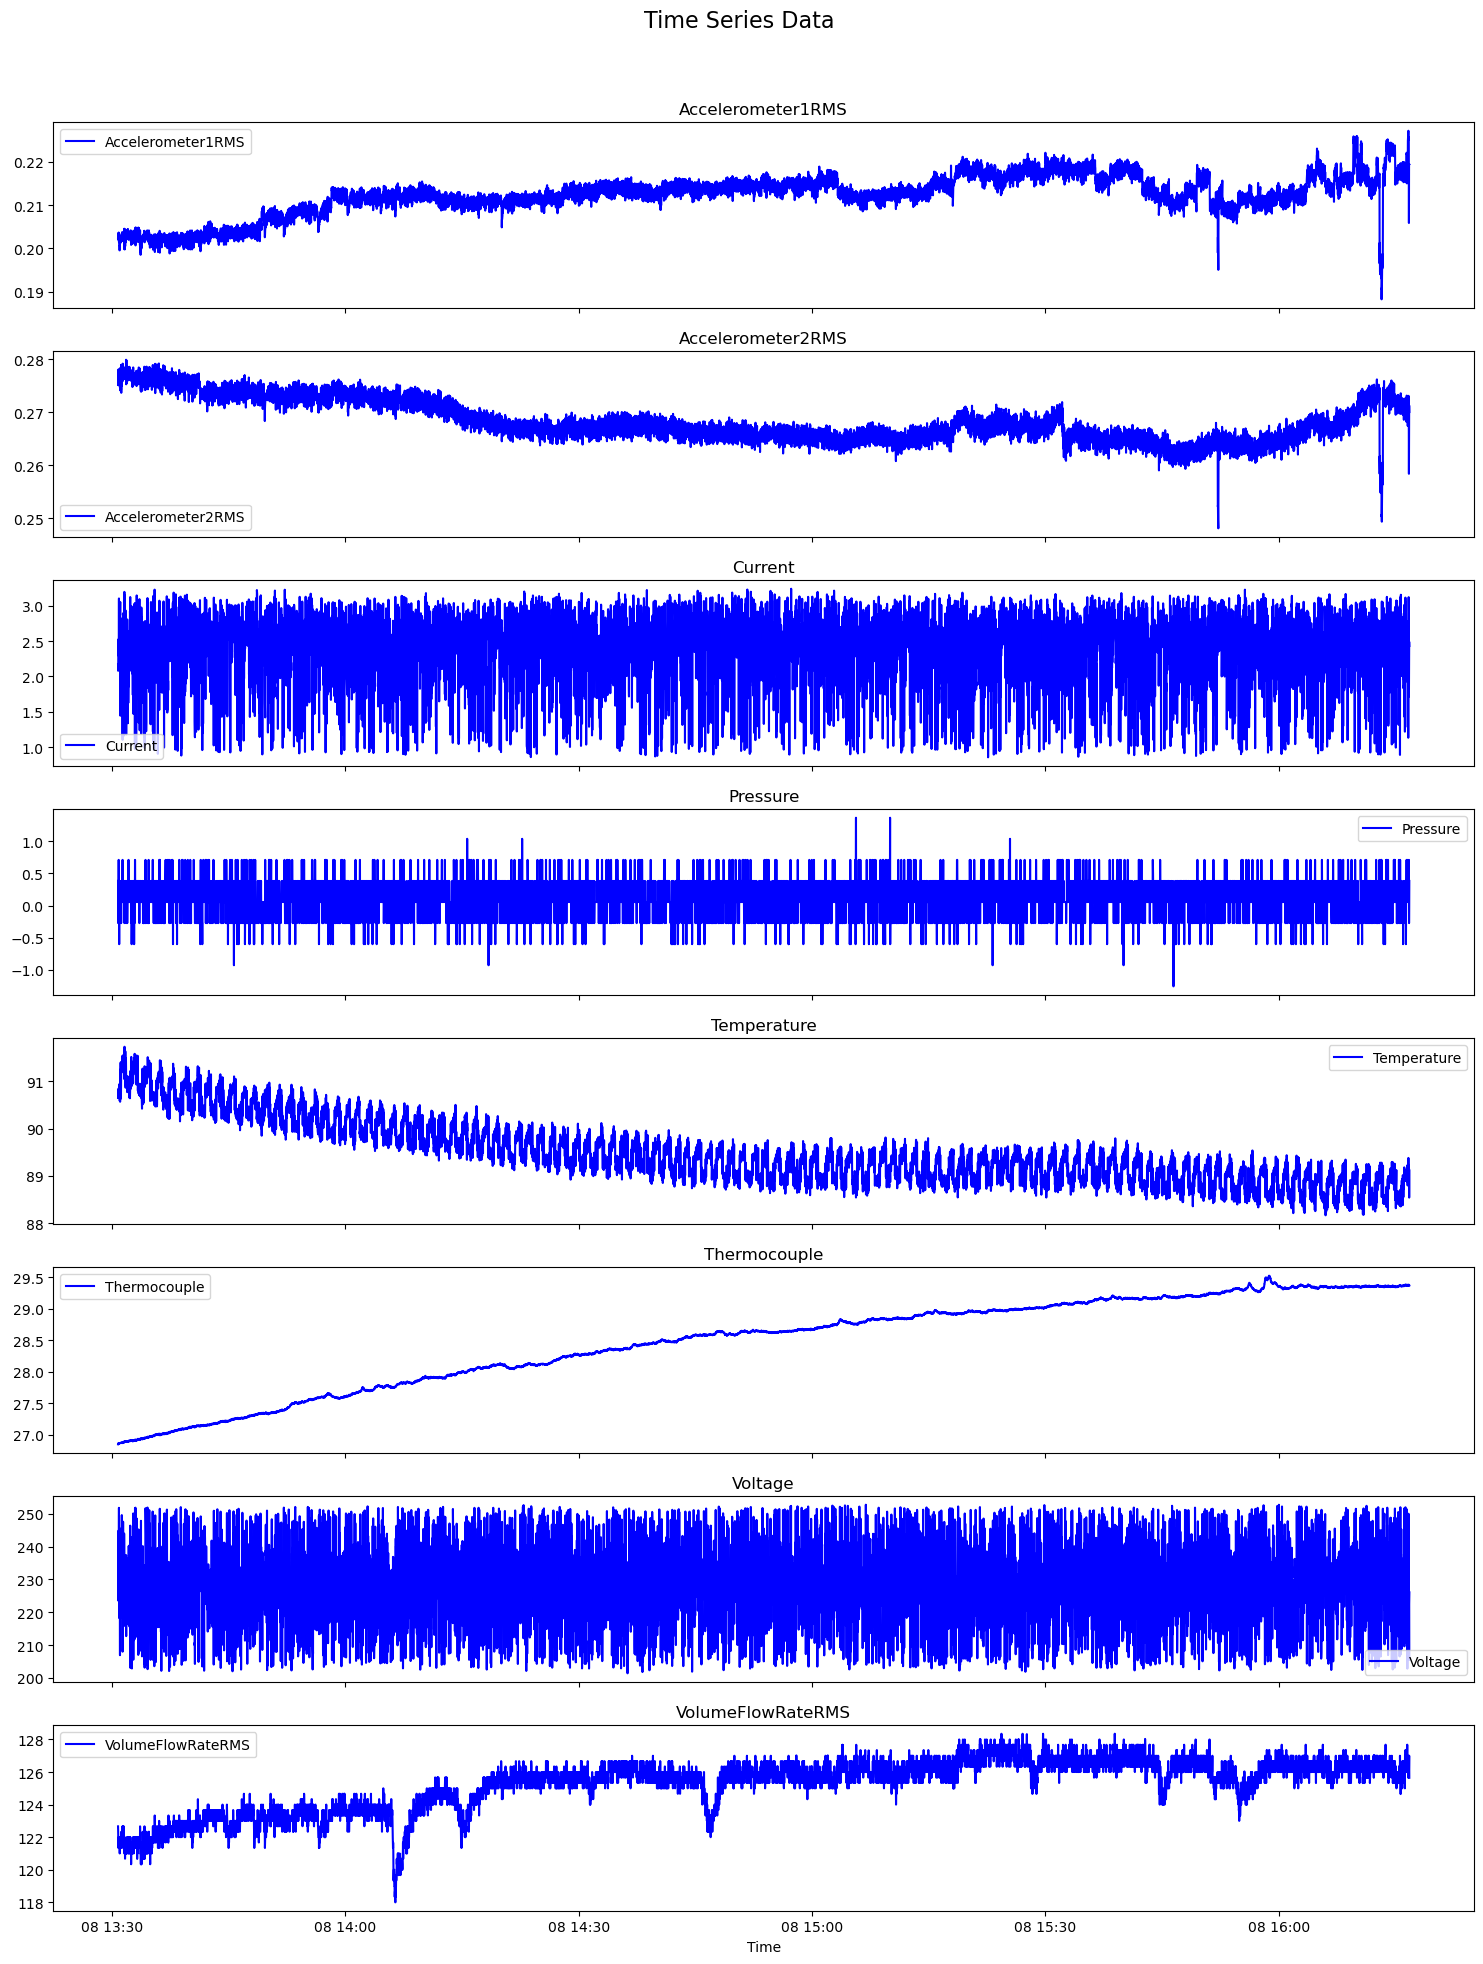

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'anomaly-free.csv'
data = pd.read_csv(file_path)

# Автоматическое разделение данных на столбцы
data_split = data.iloc[:, 0].str.split(';', expand=True)

# Проверяем количество столбцов
print(f"Количество столбцов в данных: {data_split.shape[1]}")

# Определяем названия столбцов
columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS", "changepoint"
]
columns = columns[:data_split.shape[1]]  # Обрезаем или добавляем заголовки
data_split.columns = columns

# Удаление строки заголовков, если она присутствует
if data_split.iloc[0, 0] == 'datetime':
    data_split = data_split[1:]

# Преобразование типов данных
data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
for col in columns[1:]:
    data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Визуализация всех метрик на отдельных подграфиках
fig, axes = plt.subplots(len(columns[1:]), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data', fontsize=16)

for i, col in enumerate(columns[1:]):
    axes[i].plot(data_split['datetime'], data_split[col], label=col, color='blue')
    axes[i].set_title(col)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Выведем файл из папки Value1

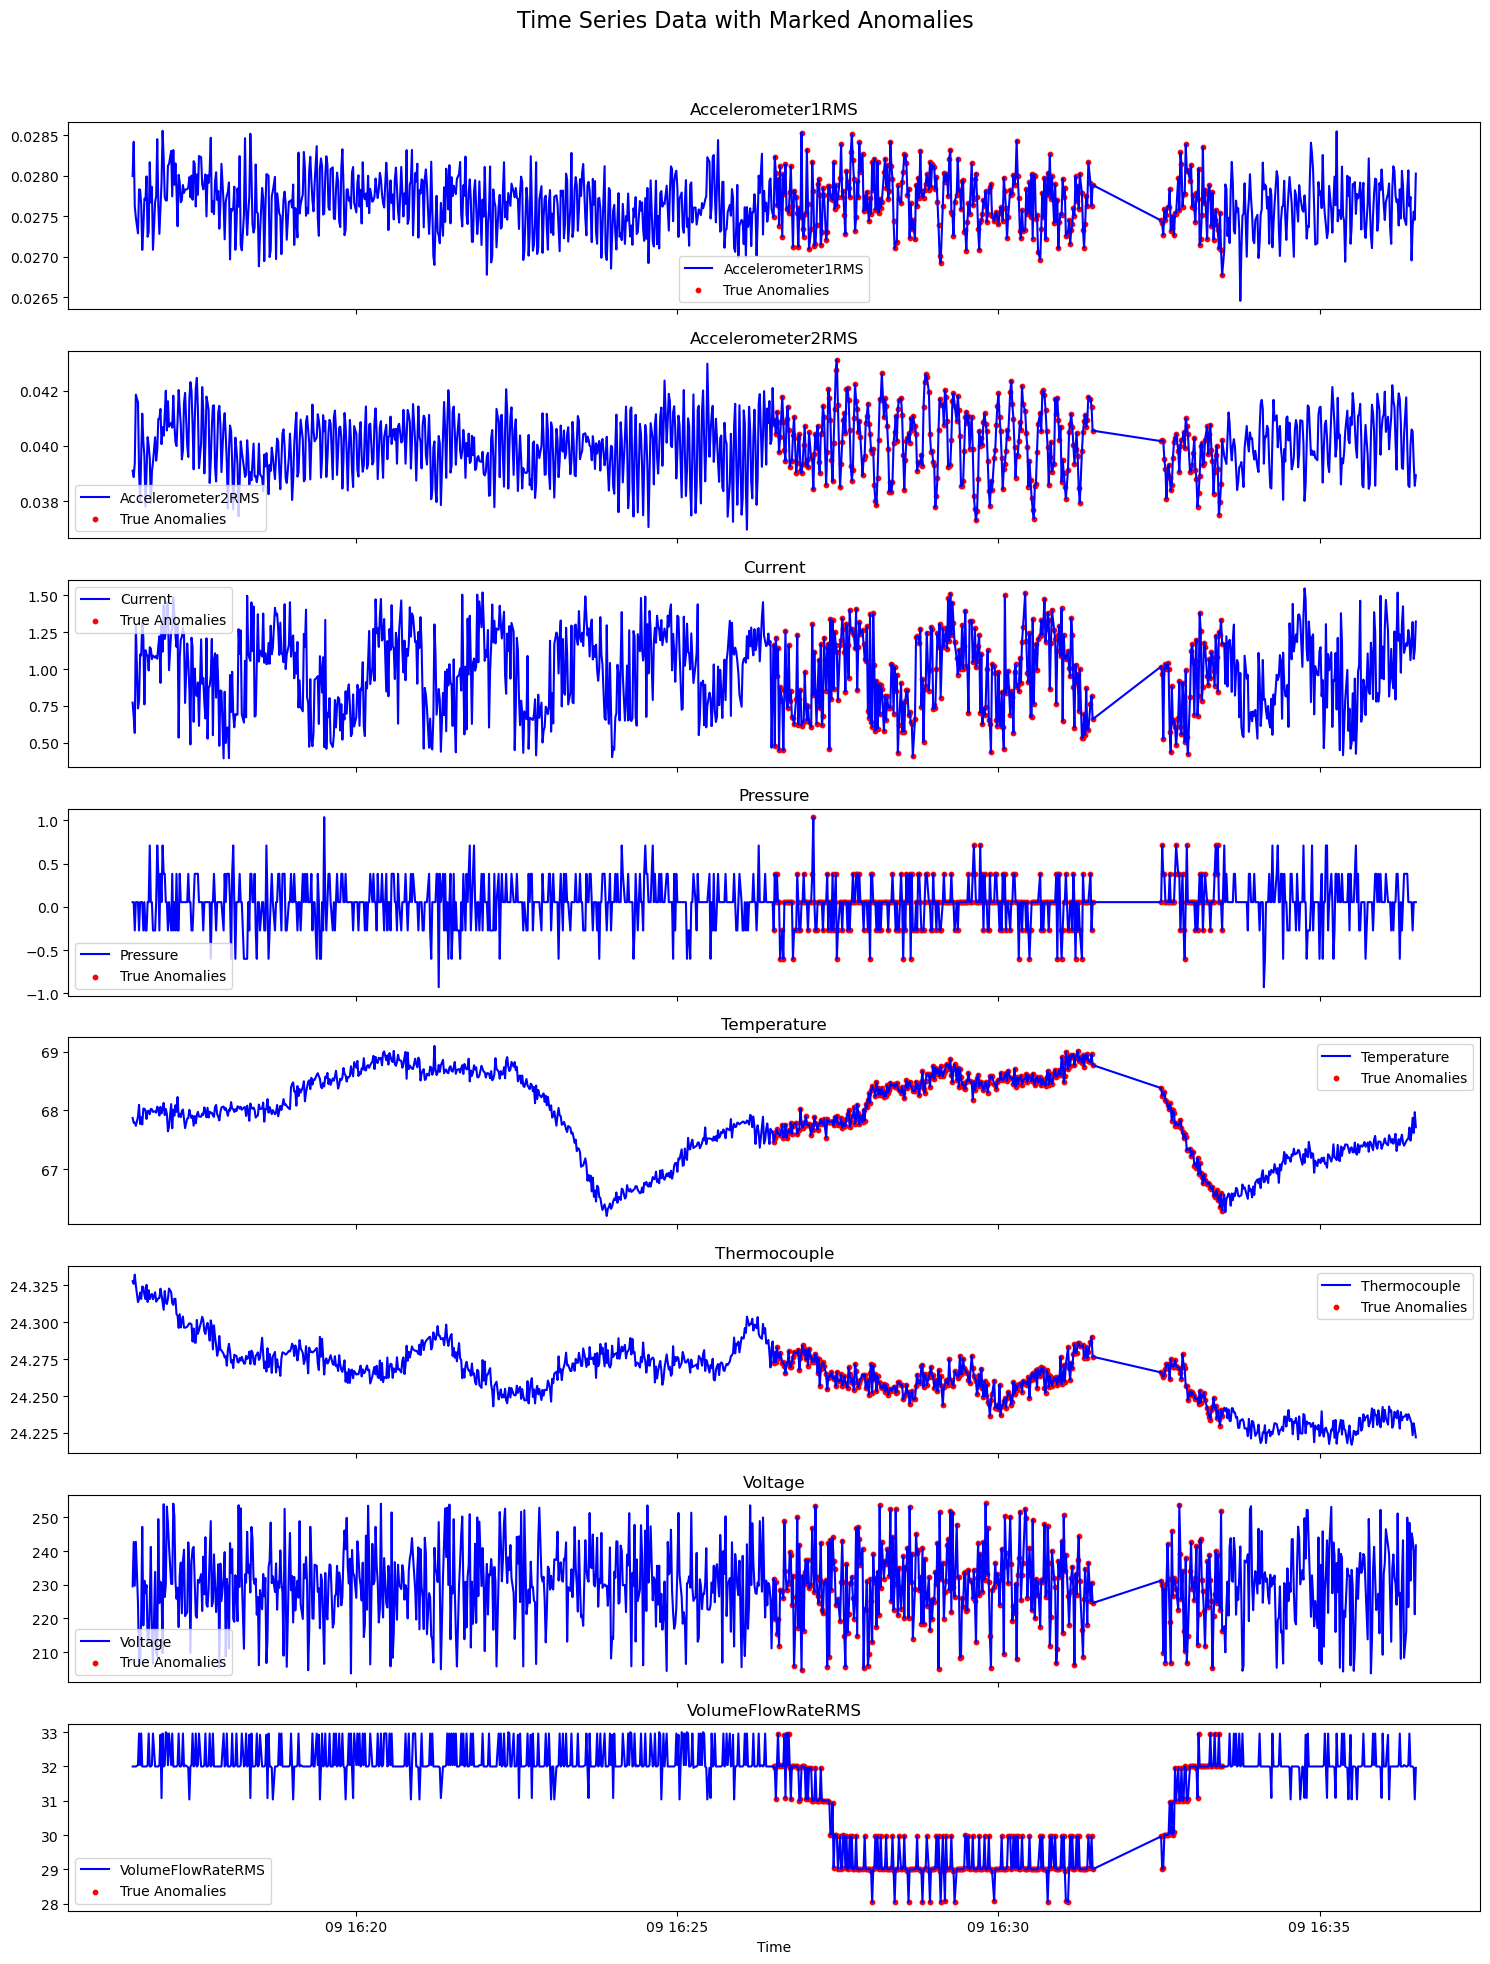

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
file_path = '1.csv'
data = pd.read_csv(file_path)

# Разделение данных на столбцы
columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS", "anomaly", "changepoint"
]
data_split = data.iloc[:, 0].str.split(';', expand=True)
data_split.columns = columns
data_split = data_split[1:]  # Удаляем строку с заголовками

# Преобразование типов данных
data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
for col in columns[1:]:
    data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Визуализация всех метрик на отдельных подграфиках с отображением аномалий
fig, axes = plt.subplots(len(columns[1:9]), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data with Marked Anomalies', fontsize=16)

for i, col in enumerate(columns[1:9]):
    axes[i].plot(data_split['datetime'], data_split[col], label=col, color='blue')
    anomaly_points = data_split[data_split['anomaly'] == 1]
    axes[i].scatter(anomaly_points['datetime'], anomaly_points[col], color='red', label='True Anomalies', s=10)
    axes[i].set_title(col)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Файл из папки Value2

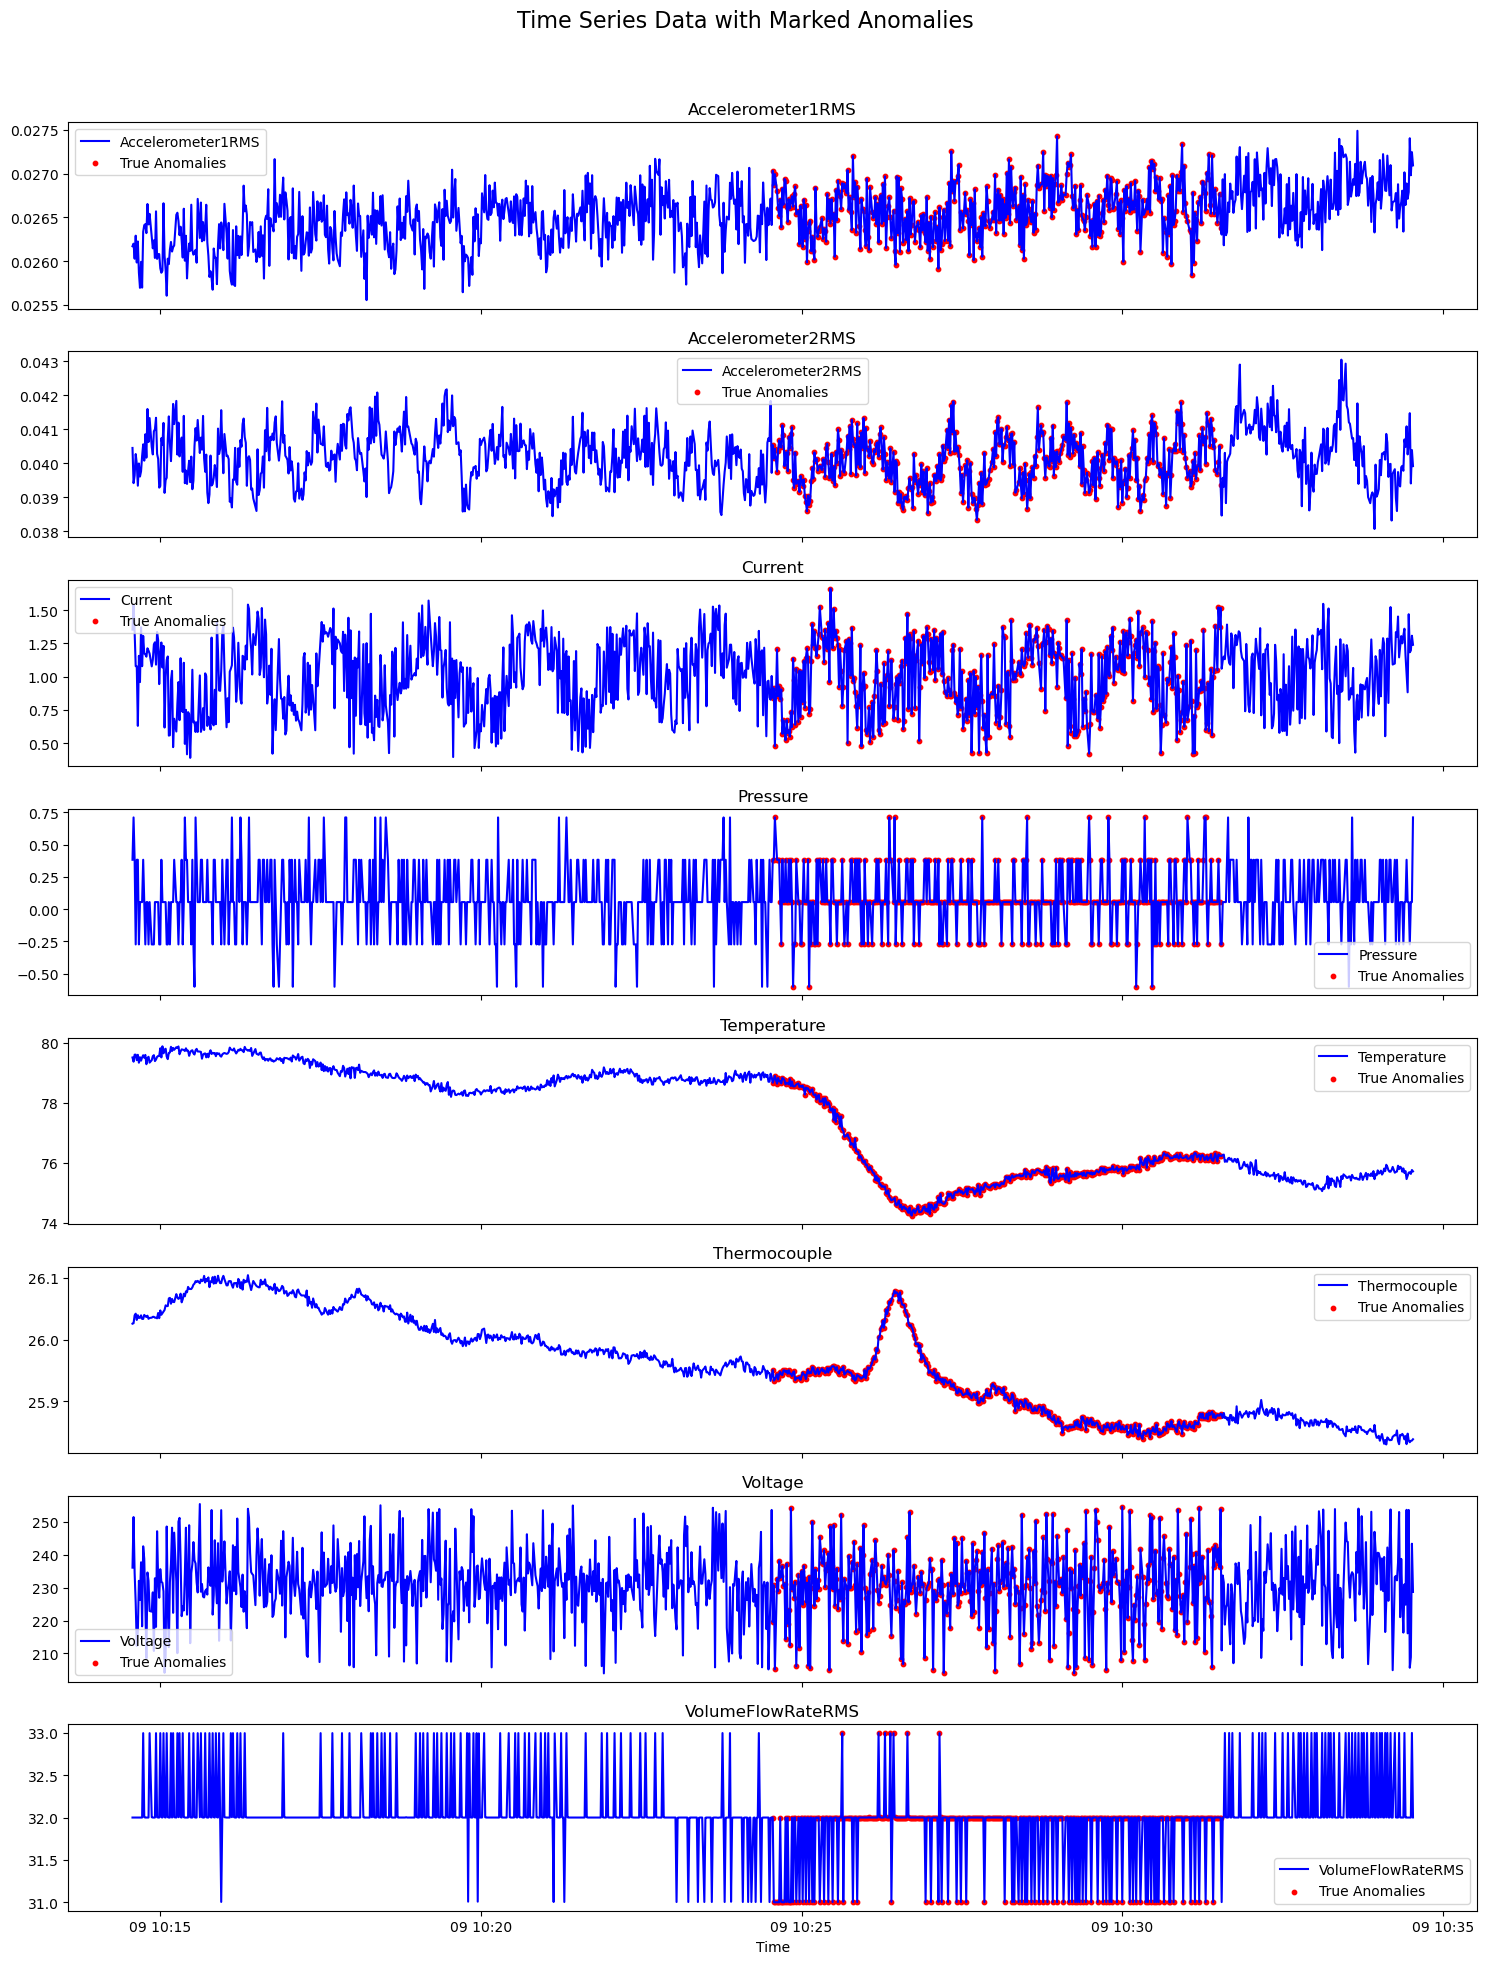

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
file_path = '0.csv'
data = pd.read_csv(file_path)

# Разделение данных на столбцы
columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS", "anomaly", "changepoint"
]
data_split = data.iloc[:, 0].str.split(';', expand=True)
data_split.columns = columns
data_split = data_split[1:]  # Удаляем строку с заголовками

# Преобразование типов данных
data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
for col in columns[1:]:
    data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Визуализация всех метрик на отдельных подграфиках с отображением аномалий
fig, axes = plt.subplots(len(columns[1:9]), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data with Marked Anomalies', fontsize=16)

for i, col in enumerate(columns[1:9]):
    axes[i].plot(data_split['datetime'], data_split[col], label=col, color='blue')
    anomaly_points = data_split[data_split['anomaly'] == 1]
    axes[i].scatter(anomaly_points['datetime'], anomaly_points[col], color='red', label='True Anomalies', s=10)
    axes[i].set_title(col)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Если обучать в лоб, то модель не отмечает все данные как аномальные т.к. на обучающем наборе значения параметров например Thermocouple и Temperature имеют разные диапазоны с файлом в котором отмеченны аномалии. 

Обнаружено аномалий: 1146


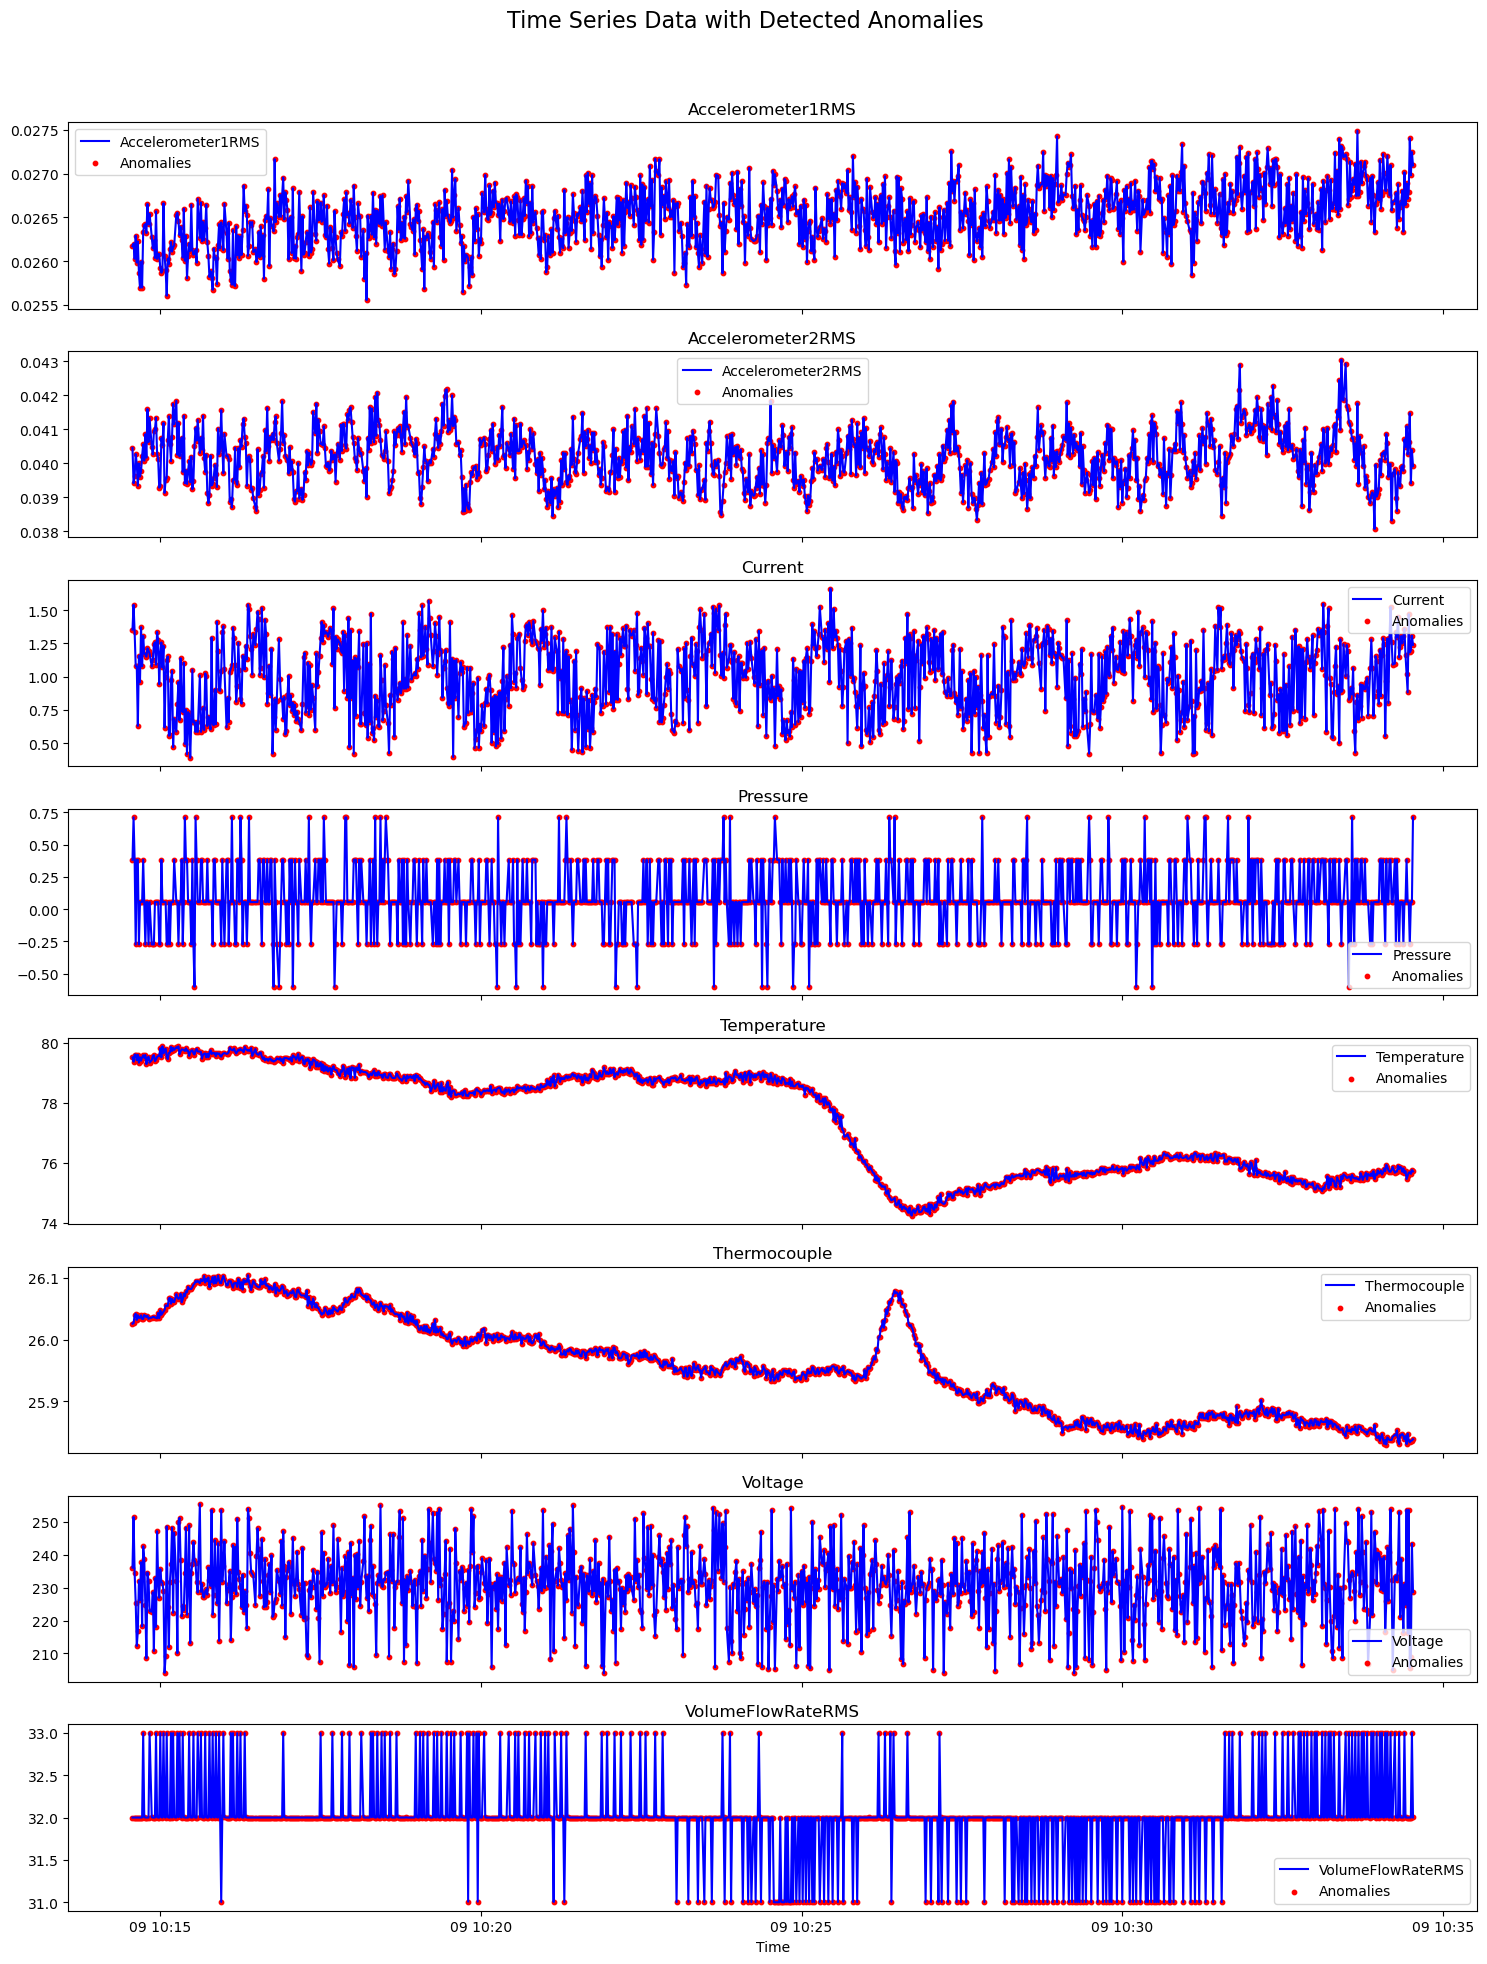

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Загрузка данных
file_path = '0.csv'
data = pd.read_csv(file_path)

# Разделение данных на столбцы
columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS", "anomaly", "changepoint"
]
data_split = data.iloc[:, 0].str.split(';', expand=True)
data_split.columns = columns
data_split = data_split[1:]  # Удаляем строку с заголовками

# Преобразование типов данных
data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
for col in columns[1:]:
    data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Загрузка обучающего набора без аномалий
anomaly_free_file_path = 'anomaly-free.csv'
anomaly_free_data = pd.read_csv(anomaly_free_file_path)
anomaly_free_split = anomaly_free_data.iloc[:, 0].str.split(';', expand=True)

# Определение столбцов для обучающего набора
training_columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS"
]
anomaly_free_split.columns = training_columns

# Преобразование типов данных
for col in training_columns[1:]:
    anomaly_free_split[col] = pd.to_numeric(anomaly_free_split[col], errors='coerce')
anomaly_free_split['datetime'] = pd.to_datetime(anomaly_free_split['datetime'], errors='coerce')

# Удаление строк с пропущенными значениями
anomaly_free_split = anomaly_free_split.dropna()

# Масштабирование данных
scaler = StandardScaler()
anomaly_free_scaled = scaler.fit_transform(anomaly_free_split[training_columns[1:]])
data_scaled = scaler.transform(data_split[columns[1:9]])

# Используем Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(anomaly_free_scaled)

# Применение модели на основном наборе
data_split['predicted_anomaly'] = model.predict(data_scaled)
data_split['predicted_anomaly'] = data_split['predicted_anomaly'].map({1: 0, -1: 1})  # 1 - нормальные, -1 - аномалии

# Подсчет аномалий
anomalies_detected = data_split[data_split['predicted_anomaly'] == 1]

print(f"Обнаружено аномалий: {len(anomalies_detected)}")

# Визуализация всех метрик на отдельных подграфиках
fig, axes = plt.subplots(len(columns[1:9]), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data with Detected Anomalies', fontsize=16)

for i, col in enumerate(columns[1:9]):
    axes[i].plot(data_split['datetime'], data_split[col], label=col, color='blue')
    axes[i].scatter(anomalies_detected['datetime'], anomalies_detected[col], color='red', label='Anomalies', s=10)
    axes[i].set_title(col)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Попробуем другой подход

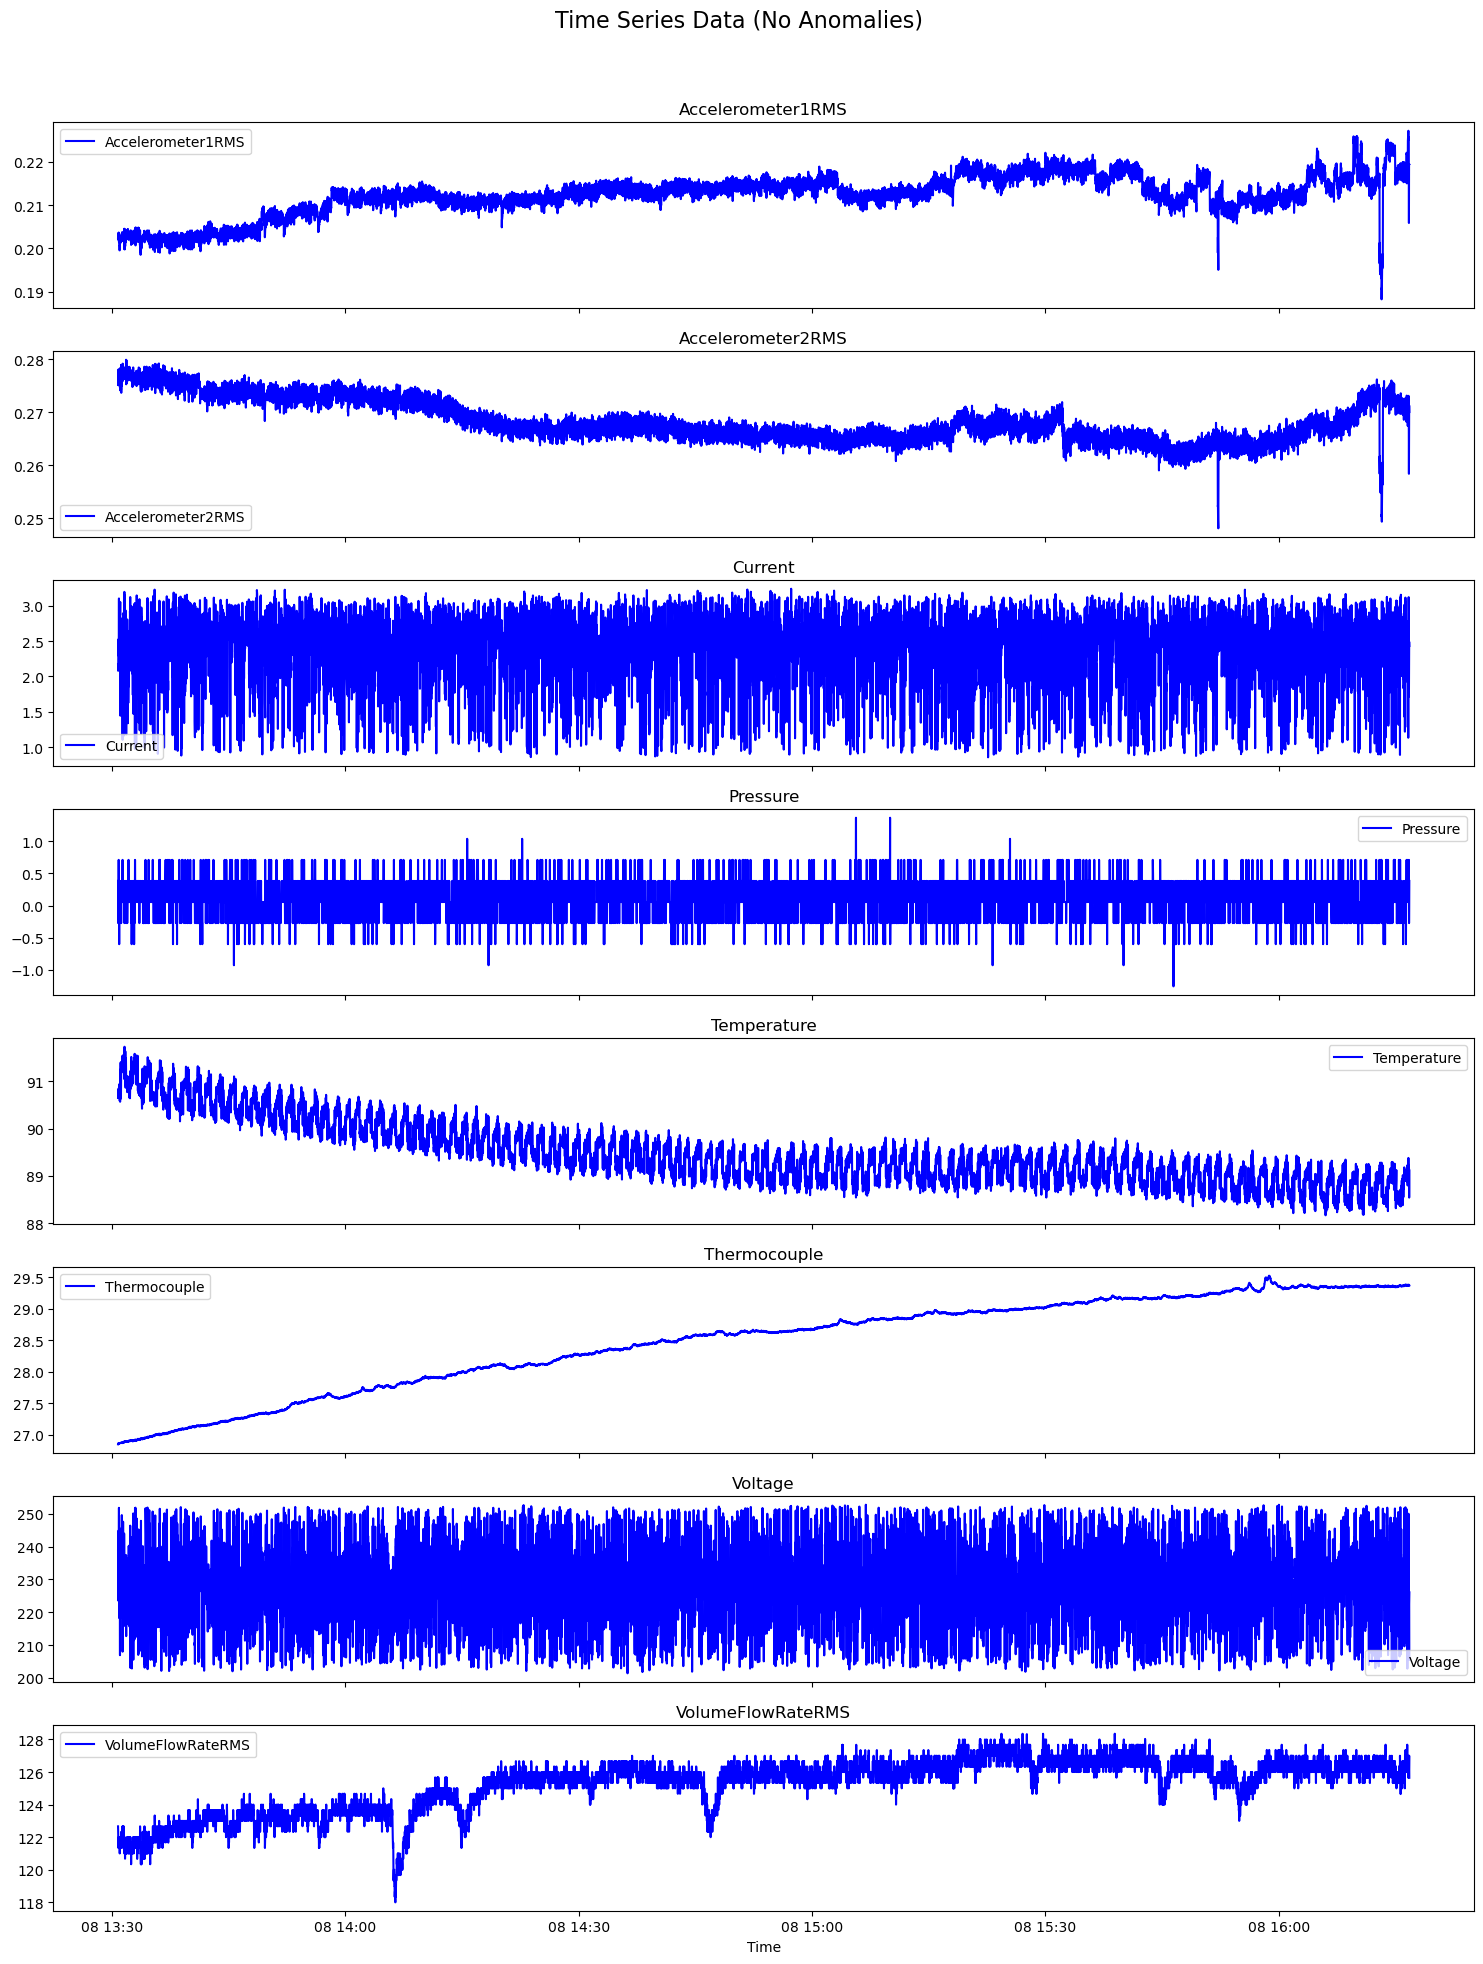

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Загрузка данных
file_path = 'anomaly-free.csv'
data = pd.read_csv(file_path)

# Автоматическое разделение данных на столбцы
data_split = data.iloc[:, 0].str.split(';', expand=True)

# Автоматическое определение заголовков
columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS", "changepoint"
]
columns = columns[:data_split.shape[1]]  # Подгоняем заголовки под количество столбцов
data_split.columns = columns

# Преобразование типов данных
data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
for col in columns[1:]:
    data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Удаление строк с пропущенными значениями
data_split = data_split.dropna()

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_split[columns[1:]])

# Применение KMeans для кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
data_split['cluster'] = kmeans.fit_predict(data_scaled)

# Сохранение модели KMeans и масштабировщика для дальнейшего использования
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Визуализация всех метрик на отдельных подграфиках
fig, axes = plt.subplots(len(columns[1:]), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data (No Anomalies)', fontsize=16)

for i, col in enumerate(columns[1:]):
    axes[i].plot(data_split['datetime'], data_split[col], label=col, color='blue')
    axes[i].set_title(col)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Обнаружено аномалий: 372


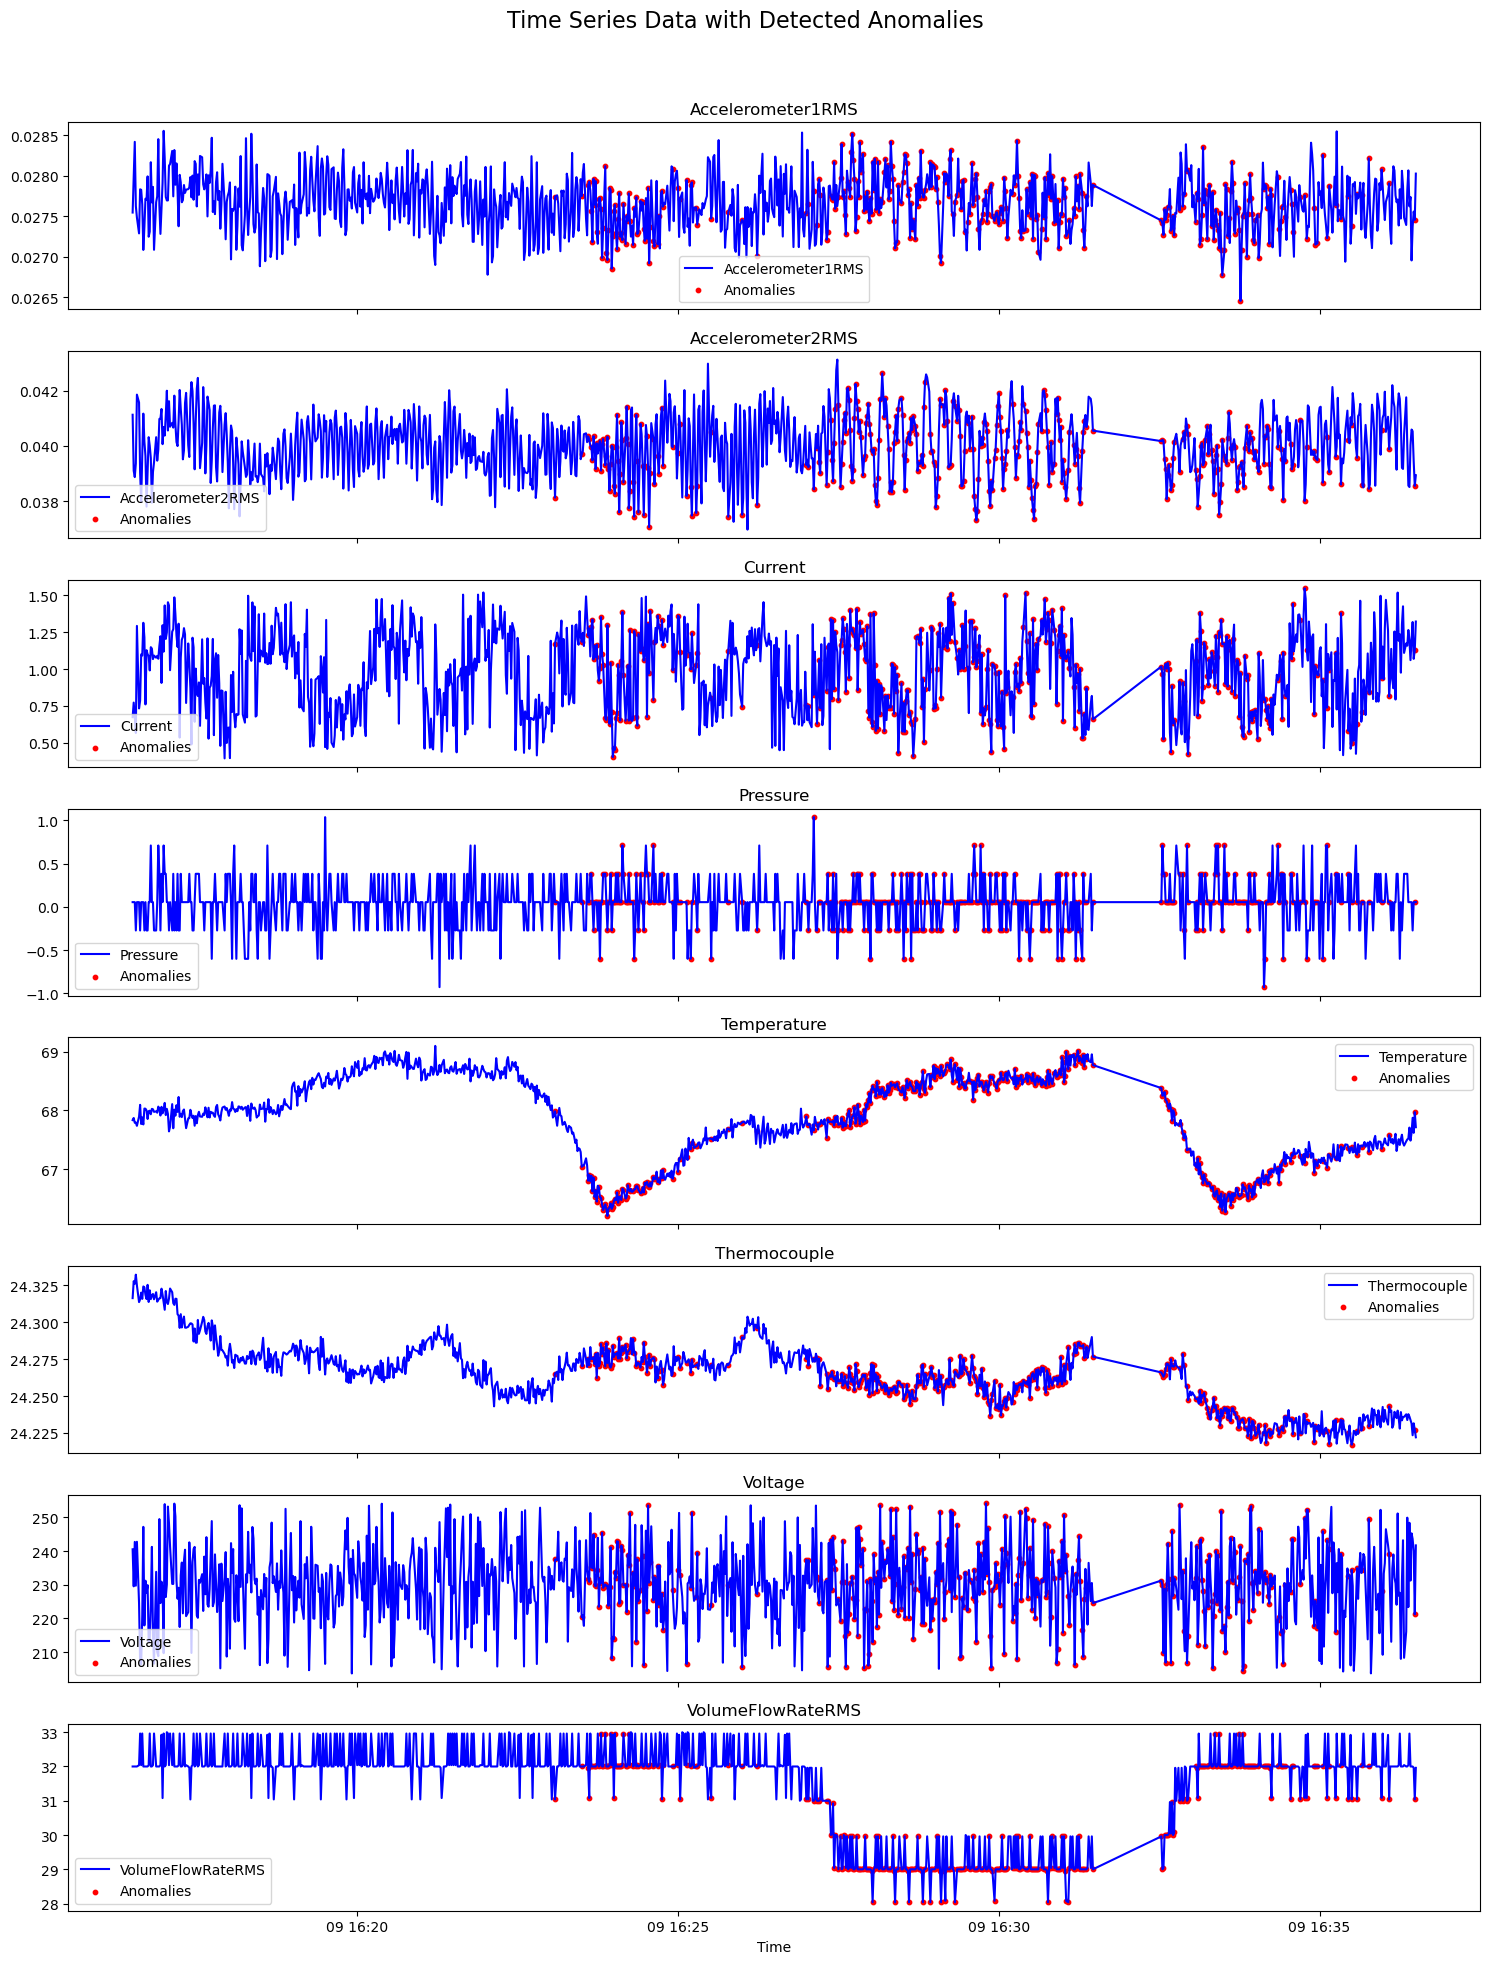

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Загрузка сохраненной модели и масштабировщика
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

# Загрузка нового файла данных
file_path = '1.csv'
data = pd.read_csv(file_path)

# Разделение данных на столбцы
data_split = data.iloc[:, 0].str.split(';', expand=True)

# Определение списка заголовков
expected_columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS", "changepoint", "anomaly"
]
# Используем только столько заголовков, сколько есть в данных
columns = expected_columns[:data_split.shape[1]]
data_split.columns = columns

# Удаление строки заголовков, если она присутствует
data_split = data_split[1:] if 'datetime' in data_split.iloc[0, 0].lower() else data_split

# Преобразование типов данных
data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
for col in columns[1:]:
    if col in data_split.columns:
        data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Удаление строк с пропущенными значениями
data_split = data_split.dropna()

# Масштабирование данных (без колонок, которых не было в обучении)
used_columns = [col for col in expected_columns[1:] if col in scaler.feature_names_in_ and col in data_split.columns]
data_scaled = scaler.transform(data_split[used_columns])

# Применение KMeans для предсказания кластеров
data_split['cluster'] = kmeans.predict(data_scaled)

# Вычисление расстояний до центроидов кластеров
distances = kmeans.transform(data_scaled)
data_split['distance_to_centroid'] = np.min(distances, axis=1)

# Установка порога для аномалий (например, 95-й процентиль расстояний)
anomaly_threshold = np.percentile(data_split['distance_to_centroid'], 65)
data_split['predicted_anomaly'] = data_split['distance_to_centroid'] > anomaly_threshold

# Подсчет и визуализация обнаруженных аномалий
anomalies = data_split[data_split['predicted_anomaly']]
print(f"Обнаружено аномалий: {len(anomalies)}")

# Визуализация всех метрик на отдельных подграфиках с выделением аномалий
fig, axes = plt.subplots(len(used_columns), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data with Detected Anomalies', fontsize=16)

for i, col in enumerate(used_columns):
    axes[i].plot(data_split['datetime'], data_split[col], label=col, color='blue')
    anomaly_points = anomalies
    axes[i].scatter(anomaly_points['datetime'], anomaly_points[col], color='red', label='Anomalies', s=10)
    axes[i].set_title(col)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Уже хорошо, обнаружили участок с аномалиями, сигналы поступили заблаговременно. Попробуем теперь на участке с данными из папки Value2

Обнаружено аномалий: 58


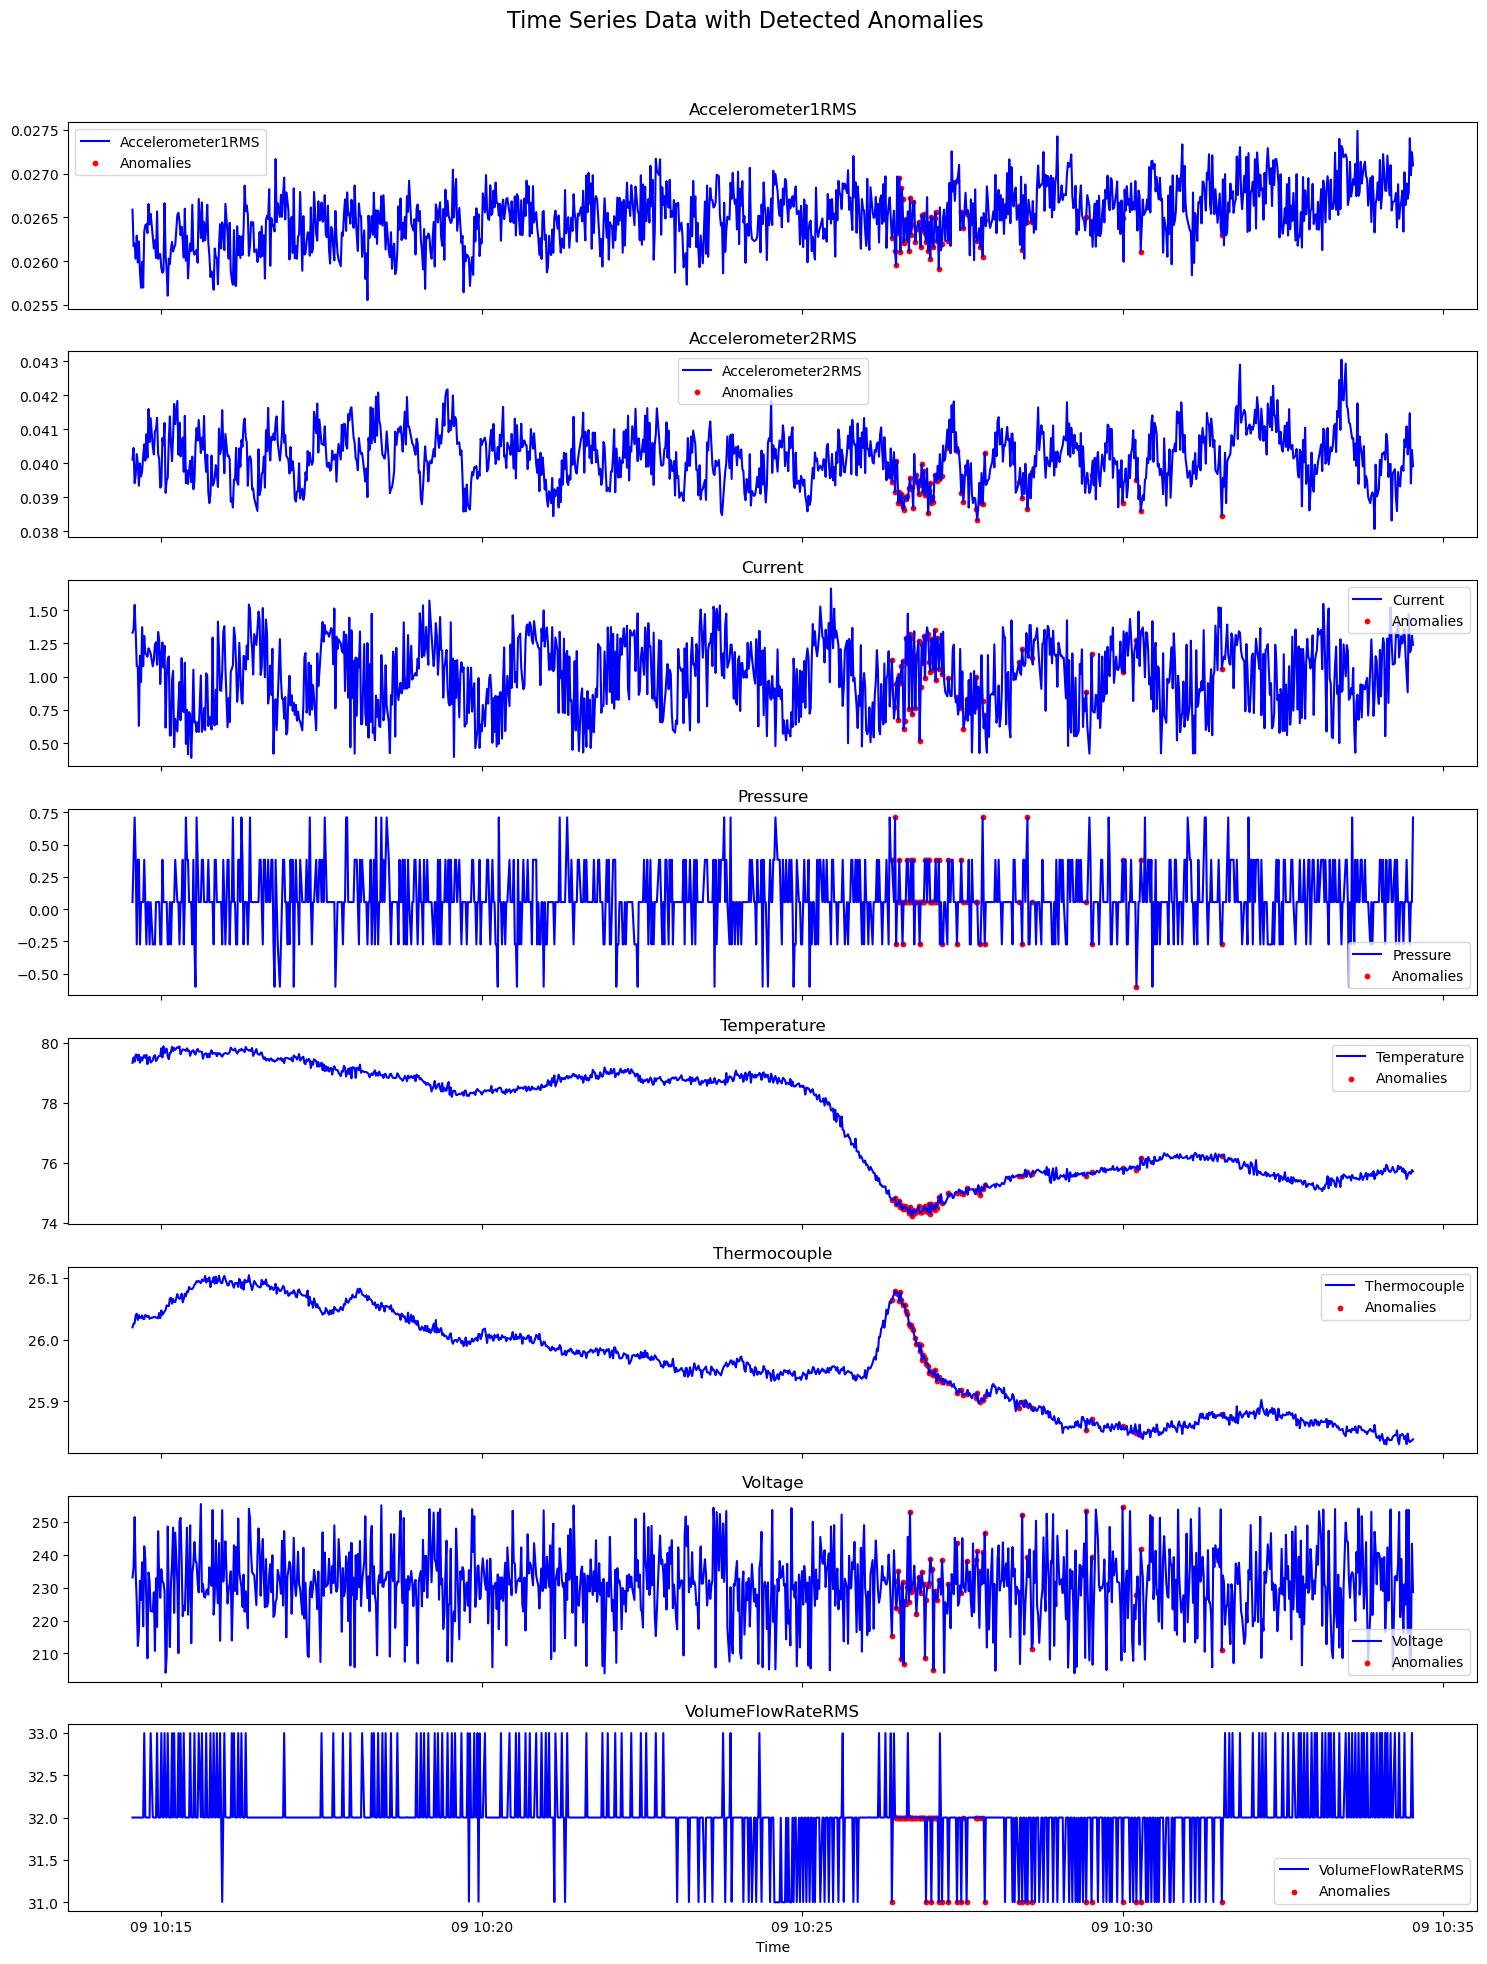

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Загрузка сохраненной модели и масштабировщика
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

# Загрузка нового файла данных
file_path = '0.csv'
data = pd.read_csv(file_path)

# Разделение данных на столбцы
data_split = data.iloc[:, 0].str.split(';', expand=True)

# Определение списка заголовков
expected_columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS", "changepoint", "anomaly"
]
# Используем только столько заголовков, сколько есть в данных
columns = expected_columns[:data_split.shape[1]]
data_split.columns = columns

# Удаление строки заголовков, если она присутствует
data_split = data_split[1:] if 'datetime' in data_split.iloc[0, 0].lower() else data_split

# Преобразование типов данных
data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
for col in columns[1:]:
    if col in data_split.columns:
        data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Удаление строк с пропущенными значениями
data_split = data_split.dropna()

# Масштабирование данных (без колонок, которых не было в обучении)
used_columns = [col for col in expected_columns[1:] if col in scaler.feature_names_in_ and col in data_split.columns]
data_scaled = scaler.transform(data_split[used_columns])

# Применение KMeans для предсказания кластеров
data_split['cluster'] = kmeans.predict(data_scaled)

# Вычисление расстояний до центроидов кластеров
distances = kmeans.transform(data_scaled)
data_split['distance_to_centroid'] = np.min(distances, axis=1)

# Установка порога для аномалий (например, 95-й процентиль расстояний)
anomaly_threshold = np.percentile(data_split['distance_to_centroid'], 95)
data_split['predicted_anomaly'] = data_split['distance_to_centroid'] > anomaly_threshold

# Подсчет и визуализация обнаруженных аномалий
anomalies = data_split[data_split['predicted_anomaly']]
print(f"Обнаружено аномалий: {len(anomalies)}")

# Визуализация всех метрик на отдельных подграфиках с выделением аномалий
fig, axes = plt.subplots(len(used_columns), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data with Detected Anomalies', fontsize=16)

for i, col in enumerate(used_columns):
    axes[i].plot(data_split['datetime'], data_split[col], label=col, color='blue')
    anomaly_points = anomalies
    axes[i].scatter(anomaly_points['datetime'], anomaly_points[col], color='red', label='Anomalies', s=10)
    axes[i].set_title(col)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Тут возникает вопрос, из за отсутствия контекста задачи, не понятно критично ли обнаружить аномалию уже после большего всплеска по Thermocouple. По времени это 5 секунд, но если это ядерный рекатор, то их может хватить чтобы сделать предсказание заранее. Попробуем как справятся с этой задачей автоэнкодеры.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Функция для подготовки обучающих данных
def prepare_train_data(file_path, expected_columns):
    data = pd.read_csv(file_path)
    data_split = data.iloc[:, 0].str.split(';', expand=True)
    actual_columns = data_split.shape[1]
    columns = expected_columns[:actual_columns]
    data_split.columns = columns

    # Преобразование типов данных
    for col in columns[1:]:
        if col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

    # Удаление строк с пропущенными значениями
    data_split = data_split.dropna()

    return data_split

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim * 4),
            nn.LeakyReLU(0.01),  # Альтернатива ReLU
            nn.Dropout(0.3),
            nn.Linear(encoding_dim * 4, encoding_dim * 2),
            nn.ELU(),  # Использование ELU
            nn.Dropout(0.2),
            nn.Linear(encoding_dim * 2, encoding_dim),
            nn.Tanh()  # Ограничение кодирования
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, encoding_dim * 2),
            nn.ELU(),
            nn.Linear(encoding_dim * 2, encoding_dim * 4),
            nn.LeakyReLU(0.01),
            nn.Linear(encoding_dim * 4, input_dim),
            nn.Sigmoid()  # Вывод в диапазоне [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Заголовки столбцов
columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS"
]

# Обучение на "чистых" данных
train_file = 'anomaly-free.csv'
train_data = prepare_train_data(train_file, columns)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data[columns[1:]])
train_tensor = torch.tensor(train_scaled, dtype=torch.float32)
train_loader = DataLoader(TensorDataset(train_tensor, train_tensor), batch_size=32, shuffle=True)

input_dim = train_scaled.shape[1]
encoding_dim = 4

autoencoder = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)

# Обучение модели
epochs = 500
for epoch in range(epochs):
    epoch_loss = 0
    for batch_features, _ in train_loader:
        optimizer.zero_grad()
        outputs = autoencoder(batch_features)
        loss = criterion(outputs, batch_features)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.6f}")





Epoch 1/500, Loss: 0.943379
Epoch 2/500, Loss: 0.849188
Epoch 3/500, Loss: 0.820641
Epoch 4/500, Loss: 0.808863
Epoch 5/500, Loss: 0.713451
Epoch 6/500, Loss: 0.696508
Epoch 7/500, Loss: 0.693687
Epoch 8/500, Loss: 0.690311
Epoch 9/500, Loss: 0.687491
Epoch 10/500, Loss: 0.685378
Epoch 11/500, Loss: 0.685145
Epoch 12/500, Loss: 0.685769
Epoch 13/500, Loss: 0.682099
Epoch 14/500, Loss: 0.683104
Epoch 15/500, Loss: 0.681418
Epoch 16/500, Loss: 0.679793
Epoch 17/500, Loss: 0.680808
Epoch 18/500, Loss: 0.679280
Epoch 19/500, Loss: 0.678260
Epoch 20/500, Loss: 0.677680
Epoch 21/500, Loss: 0.673751
Epoch 22/500, Loss: 0.674199
Epoch 23/500, Loss: 0.673258
Epoch 24/500, Loss: 0.672148
Epoch 25/500, Loss: 0.672076
Epoch 26/500, Loss: 0.671642
Epoch 27/500, Loss: 0.672359
Epoch 28/500, Loss: 0.671255
Epoch 29/500, Loss: 0.674000
Epoch 30/500, Loss: 0.673602
Epoch 31/500, Loss: 0.670962
Epoch 32/500, Loss: 0.670458
Epoch 33/500, Loss: 0.671372
Epoch 34/500, Loss: 0.670132
Epoch 35/500, Loss: 0.6

Обнаружено аномалий: 58


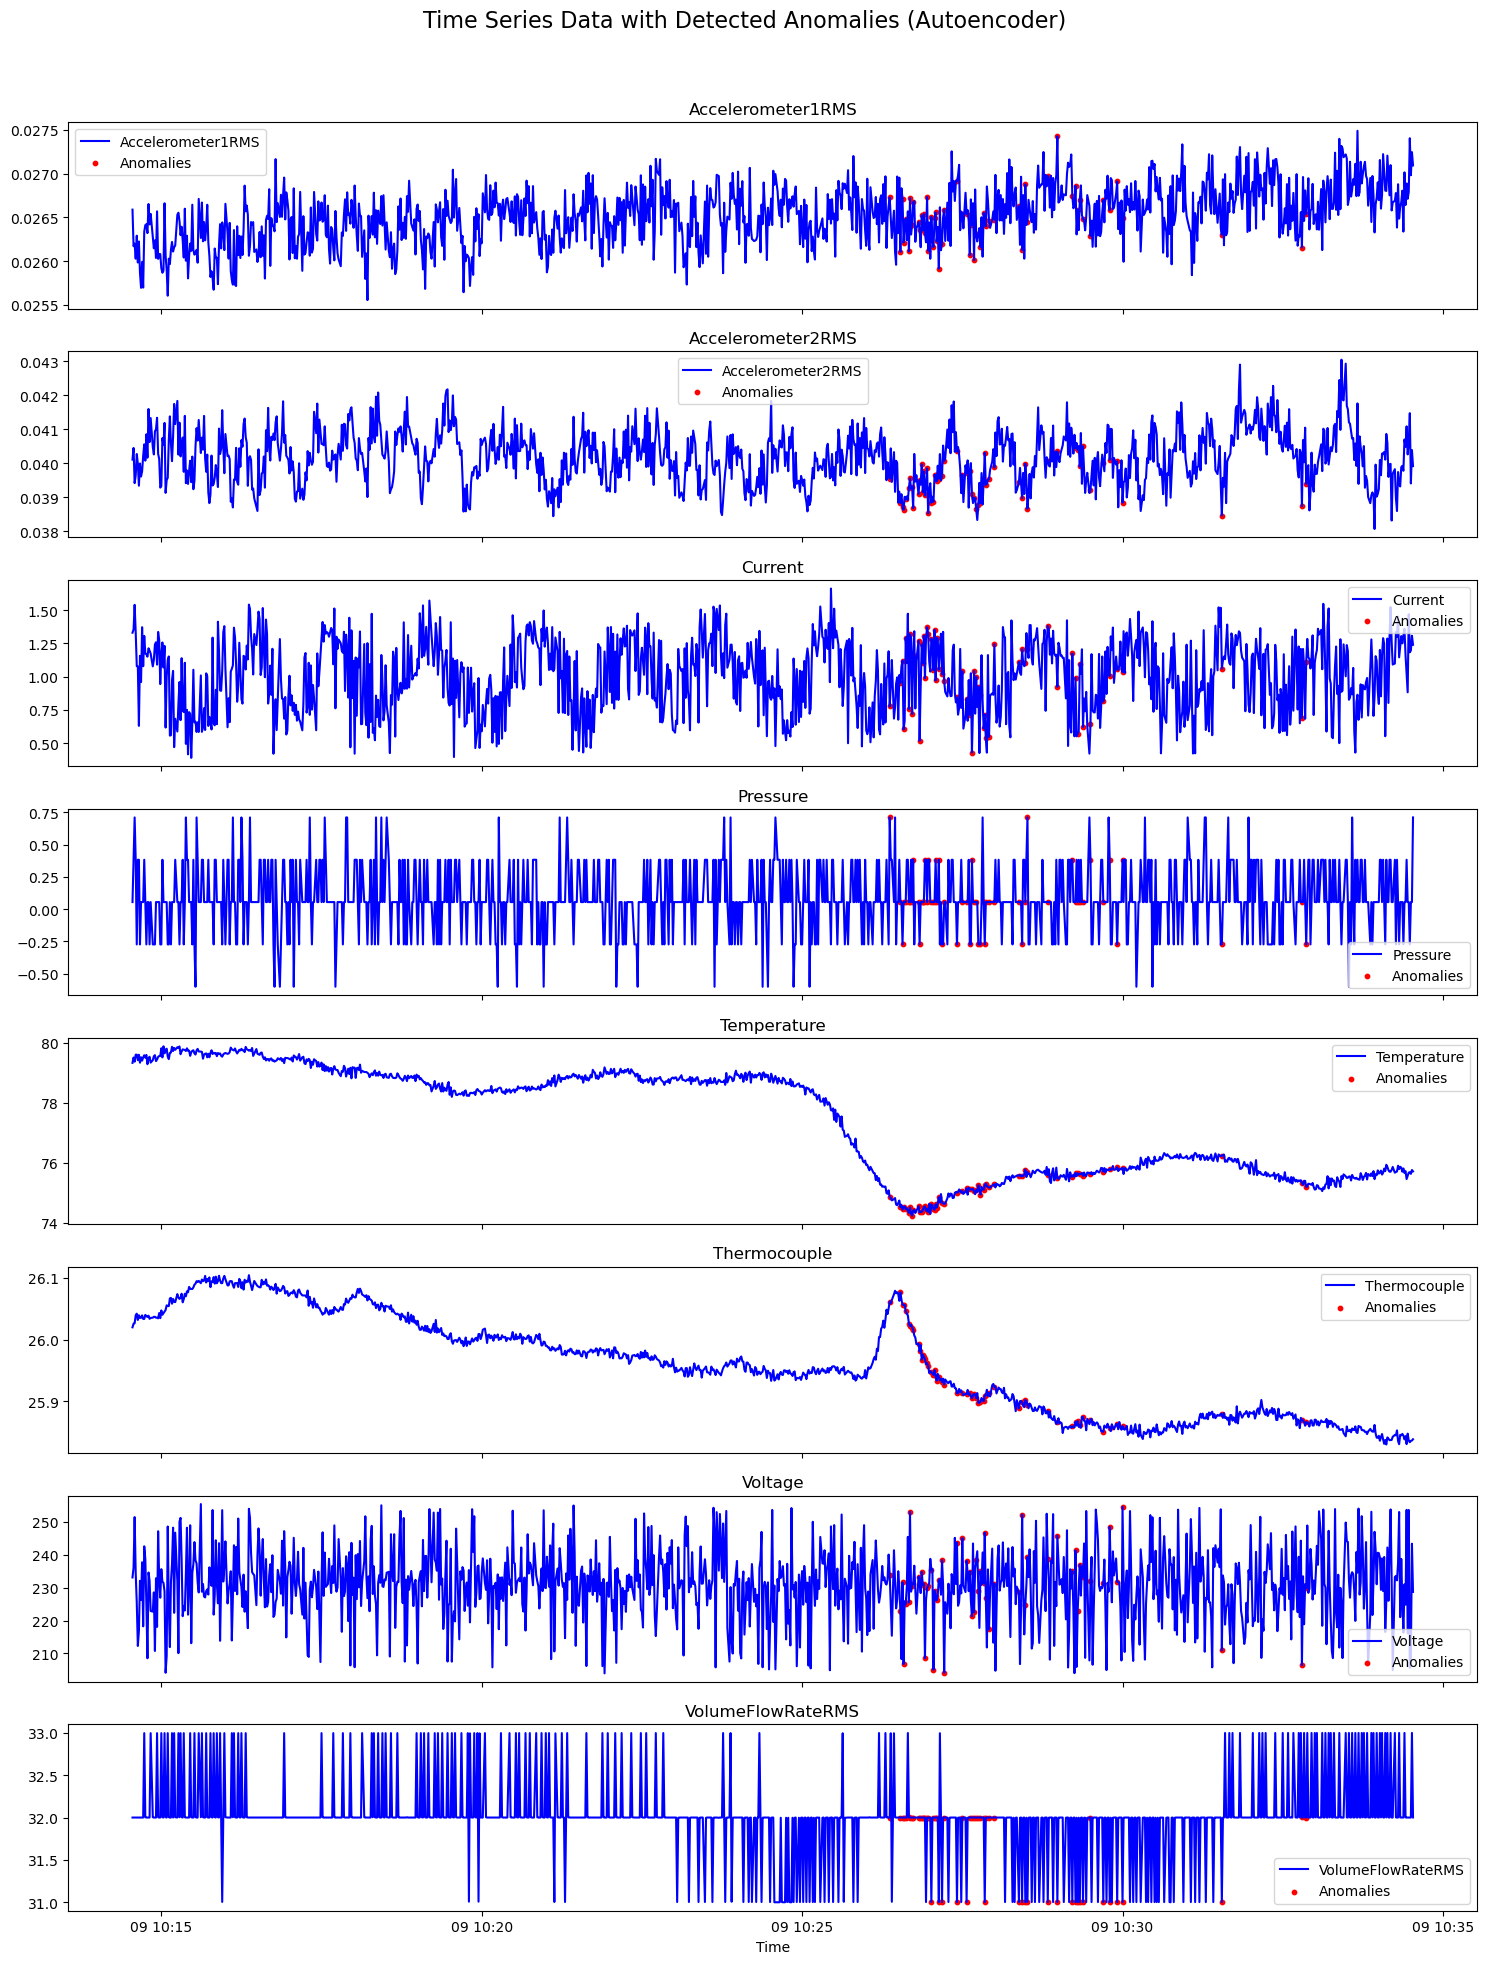

In [57]:
# Функция для подготовки тестовых данных
def prepare_test_data(file_path, expected_columns):
    data = pd.read_csv(file_path)
    data_split = data.iloc[:, 0].str.split(';', expand=True)
    actual_columns = data_split.shape[1]
    data_split.columns = [f"column_{i}" for i in range(actual_columns)]  # Временные заголовки

    # Оставляем только те колонки, которые есть в expected_columns
    column_mapping = {f"column_{i}": col for i, col in enumerate(expected_columns) if i < actual_columns}
    data_split = data_split.rename(columns=column_mapping)
    data_split = data_split[[col for col in expected_columns if col in data_split.columns]]

    # Преобразование типов данных
    if 'datetime' in data_split.columns:
        data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
    for col in expected_columns[1:]:
        if col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

    # Удаление строк с пропущенными значениями
    data_split = data_split.dropna()

    return data_split

# Тестирование на новых данных
test_file = '0.csv'
test_data = prepare_test_data(test_file, columns)
scaler_columns = [col for col in columns[1:] if col in test_data.columns]
test_scaled = scaler.transform(test_data[scaler_columns])
test_tensor = torch.tensor(test_scaled, dtype=torch.float32)

with torch.no_grad():
    reconstructed = autoencoder(test_tensor).numpy()
mse = np.mean(np.power(test_scaled - reconstructed, 2), axis=1)

# Установка порога для аномалий
anomaly_threshold = np.percentile(mse, 95)
test_data['mse'] = mse
test_data['predicted_anomaly'] = test_data['mse'] > anomaly_threshold

# Подсчет и визуализация обнаруженных аномалий
anomalies = test_data[test_data['predicted_anomaly']]
print(f"Обнаружено аномалий: {len(anomalies)}")

fig, axes = plt.subplots(len(scaler_columns), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data with Detected Anomalies (Autoencoder)', fontsize=16)

for i, col in enumerate(scaler_columns):
    if col in test_data.columns:
        axes[i].plot(test_data['datetime'], test_data[col], label=col, color='blue')
        anomaly_points = anomalies
        axes[i].scatter(anomaly_points['datetime'], anomaly_points[col], color='red', label='Anomalies', s=10)
        axes[i].set_title(col)
        axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Теперь попробуем CNN автоэнкодер из который был на практике

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Функция для подготовки обучающих данных
def prepare_train_data(file_path, expected_columns):
    data = pd.read_csv(file_path)
    data_split = data.iloc[:, 0].str.split(';', expand=True)
    actual_columns = data_split.shape[1]
    columns = expected_columns[:actual_columns]
    data_split.columns = columns

    # Преобразование типов данных
    for col in columns[1:]:
        if col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

    # Удаление строк с пропущенными значениями
    data_split = data_split.dropna()

    return data_split

# Построение автоэнкодера на основе Conv1D и Conv1DTranspose
class Conv1DAutoencoder(nn.Module):
    def __init__(self, input_channels, encoding_dim):
        super(Conv1DAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=input_channels, out_channels=32, kernel_size=7, stride=2, padding=3),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv1d(in_channels=32, out_channels=16, kernel_size=7, stride=2, padding=3),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(in_channels=16, out_channels=16, kernel_size=7, stride=2, padding=3, output_padding=1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.ConvTranspose1d(in_channels=16, out_channels=32, kernel_size=7, stride=2, padding=3, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels=32, out_channels=1, kernel_size=7, stride=1, padding=3)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Заголовки столбцов
columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS"
]

# Обучение на "чистых" данных
train_file = 'anomaly-free.csv'
train_data = prepare_train_data(train_file, columns)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data[columns[1:]])
train_tensor = torch.tensor(train_scaled, dtype=torch.float32)
train_loader = DataLoader(TensorDataset(train_tensor, train_tensor), batch_size=32, shuffle=True)

input_dim = train_scaled.shape[1]
encoding_dim = 4

input_channels = 1  # Количество входных каналов
model = Conv1DAutoencoder(input_channels, encoding_dim=4)
print(model)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)

# Обучение модели
epochs = 50
for epoch in range(epochs):
    epoch_loss = 0
    for batch_features, _ in train_loader:
        optimizer.zero_grad()
        outputs = autoencoder(batch_features)
        loss = criterion(outputs, batch_features)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.6f}")




Conv1DAutoencoder(
  (encoder): Sequential(
    (0): Conv1d(1, 32, kernel_size=(7,), stride=(2,), padding=(3,))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv1d(32, 16, kernel_size=(7,), stride=(2,), padding=(3,))
    (4): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose1d(16, 16, kernel_size=(7,), stride=(2,), padding=(3,), output_padding=(1,))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): ConvTranspose1d(16, 32, kernel_size=(7,), stride=(2,), padding=(3,), output_padding=(1,))
    (4): ReLU()
    (5): ConvTranspose1d(32, 1, kernel_size=(7,), stride=(1,), padding=(3,))
  )
)
Epoch 1/50, Loss: 0.695903
Epoch 2/50, Loss: 0.695215
Epoch 3/50, Loss: 0.695779
Epoch 4/50, Loss: 0.695064
Epoch 5/50, Loss: 0.695163
Epoch 6/50, Loss: 0.695367
Epoch 7/50, Loss: 0.695962
Epoch 8/50, Loss: 0.693495
Epoch 9/50, Loss: 0.694529
Epoch 10/50, Loss: 0.694227
Epoch 11/50, Loss: 0.694830
Epoch 12/50, Loss: 0.694428
Epoch 13/50, Loss: 0.695004
Epoch 14/50,

Обнаружено аномалий: 402


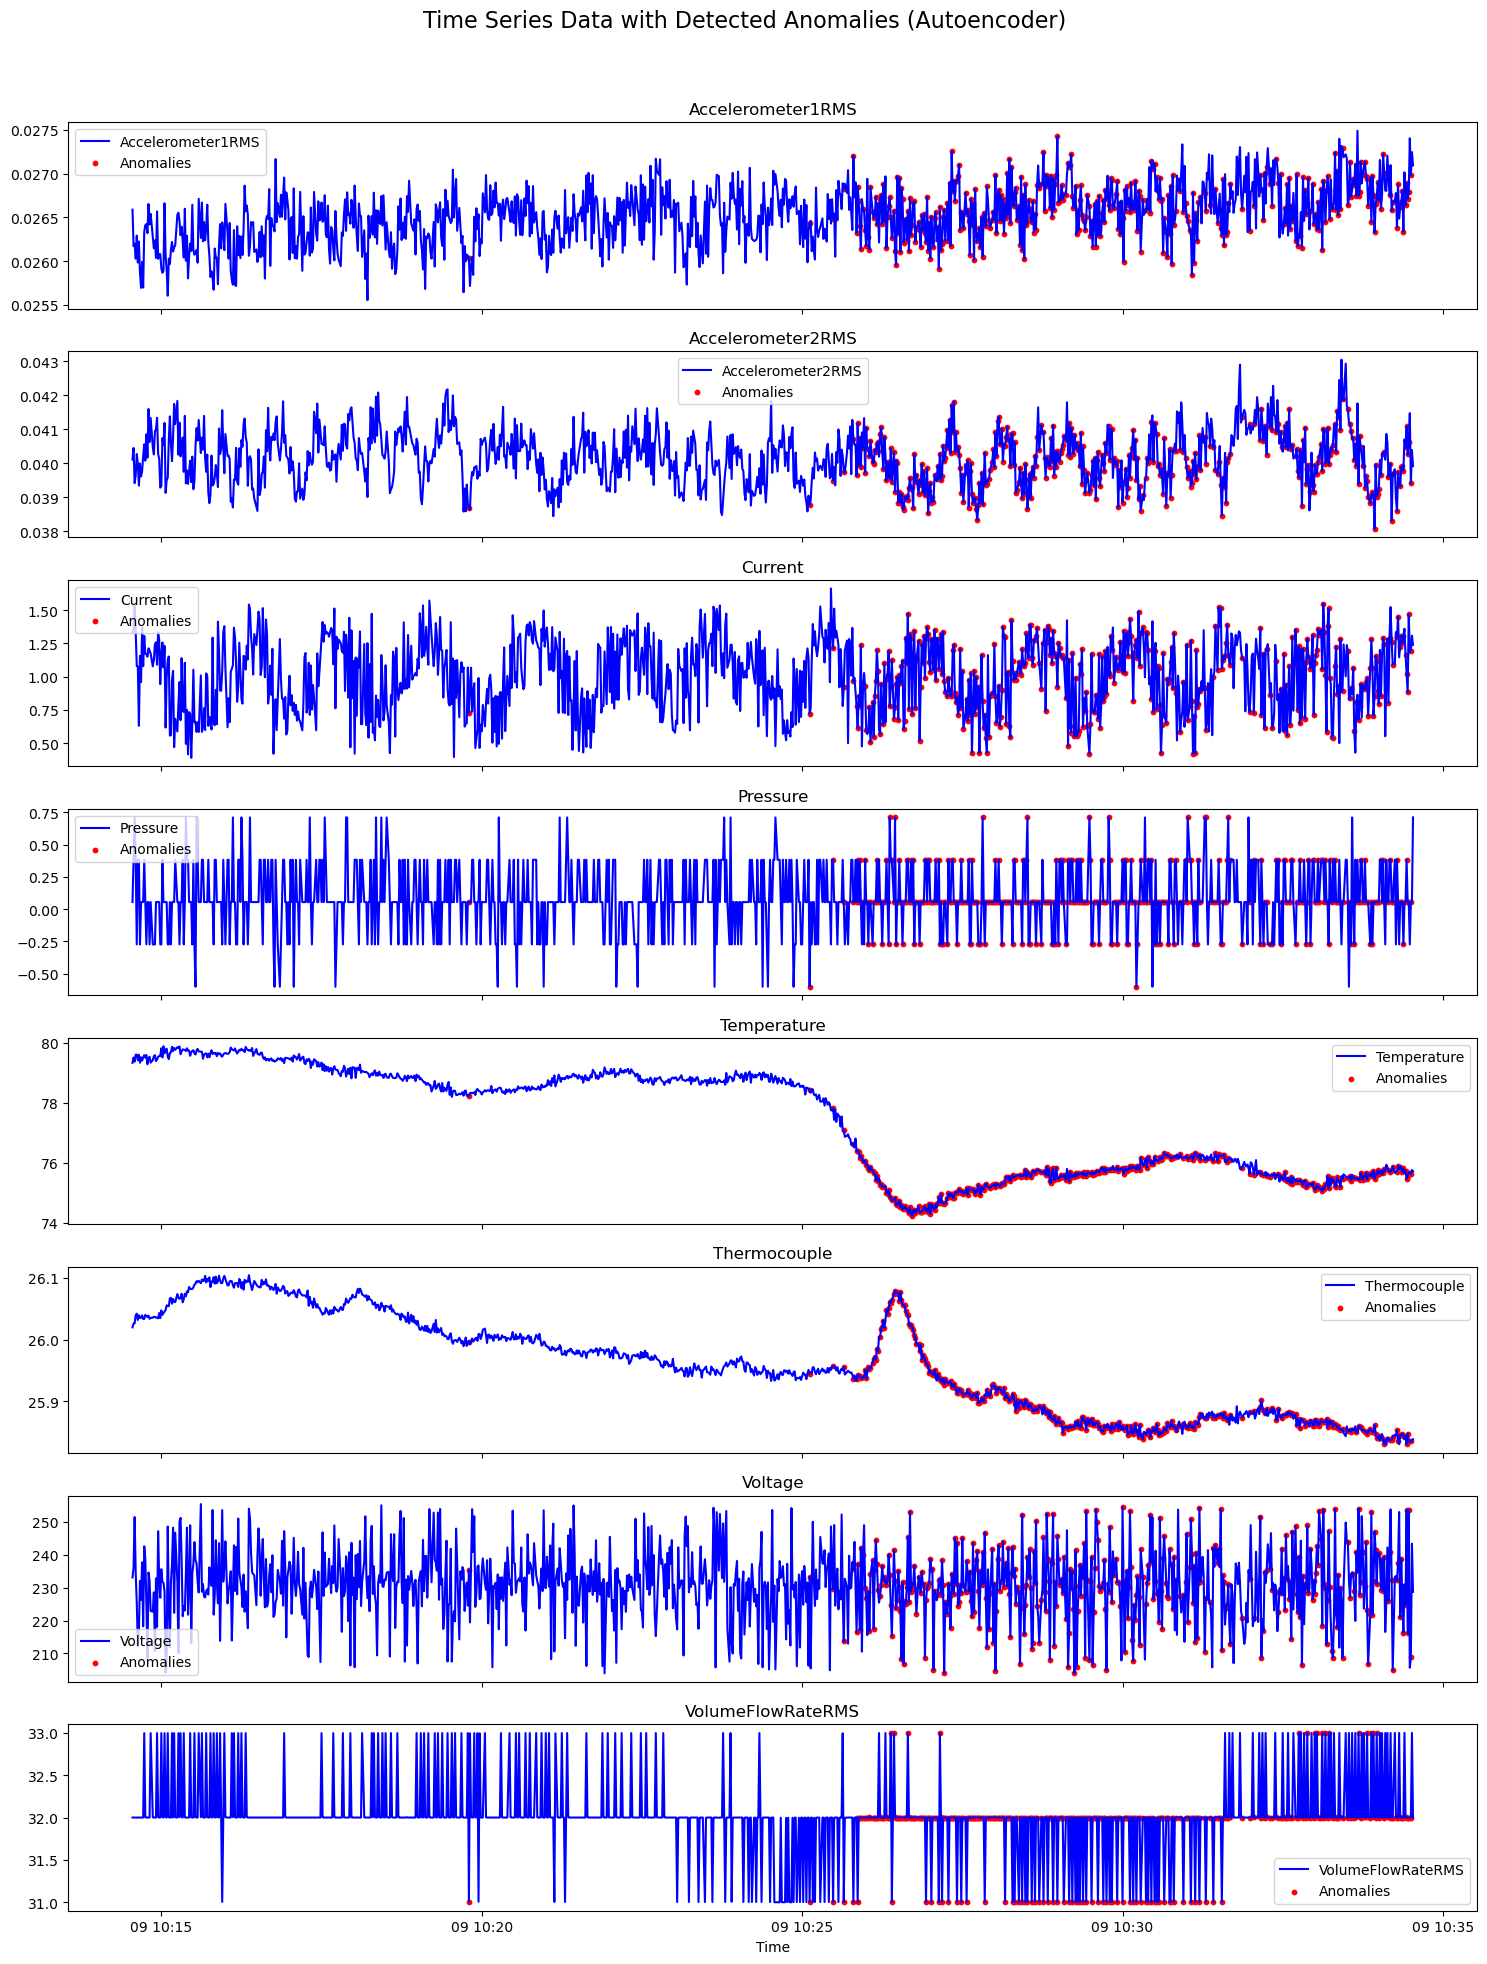

In [85]:
# Функция для подготовки тестовых данных
def prepare_test_data(file_path, expected_columns):
    data = pd.read_csv(file_path)
    data_split = data.iloc[:, 0].str.split(';', expand=True)
    actual_columns = data_split.shape[1]
    data_split.columns = [f"column_{i}" for i in range(actual_columns)]  # Временные заголовки

    # Оставляем только те колонки, которые есть в expected_columns
    column_mapping = {f"column_{i}": col for i, col in enumerate(expected_columns) if i < actual_columns}
    data_split = data_split.rename(columns=column_mapping)
    data_split = data_split[[col for col in expected_columns if col in data_split.columns]]

    # Преобразование типов данных
    if 'datetime' in data_split.columns:
        data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
    for col in expected_columns[1:]:
        if col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

    # Удаление строк с пропущенными значениями
    data_split = data_split.dropna()

    return data_split

# Тестирование на новых данных
test_file = '0.csv'
test_data = prepare_test_data(test_file, columns)
scaler_columns = [col for col in columns[1:] if col in test_data.columns]
test_scaled = scaler.transform(test_data[scaler_columns])
test_tensor = torch.tensor(test_scaled, dtype=torch.float32)

with torch.no_grad():
    reconstructed = autoencoder(test_tensor).numpy()
mse = np.mean(np.power(test_scaled - reconstructed, 2), axis=1)

# Установка порога для аномалий
anomaly_threshold = np.percentile(mse, 65)
test_data['mse'] = mse
test_data['predicted_anomaly'] = test_data['mse'] > anomaly_threshold

# Подсчет и визуализация обнаруженных аномалий
anomalies = test_data[test_data['predicted_anomaly']]
print(f"Обнаружено аномалий: {len(anomalies)}")

fig, axes = plt.subplots(len(scaler_columns), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data with Detected Anomalies (Autoencoder)', fontsize=16)

for i, col in enumerate(scaler_columns):
    if col in test_data.columns:
        axes[i].plot(test_data['datetime'], test_data[col], label=col, color='blue')
        anomaly_points = anomalies
        axes[i].scatter(anomaly_points['datetime'], anomaly_points[col], color='red', label='Anomalies', s=10)
        axes[i].set_title(col)
        axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Тоже самое, зананее предсказать не удалось...

Пробуем трансформеры

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Функция для подготовки обучающих данных
def prepare_train_data(file_path, expected_columns):
    data = pd.read_csv(file_path)
    data_split = data.iloc[:, 0].str.split(';', expand=True)
    actual_columns = data_split.shape[1]
    columns = expected_columns[:actual_columns]
    data_split.columns = columns

    # Преобразование типов данных
    for col in columns[1:]:
        if col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

    # Удаление строк с пропущенными значениями
    data_split = data_split.dropna()

    return data_split

class AttentionAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim, num_heads):
        super(AttentionAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim * 4),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(encoding_dim * 4, encoding_dim * 2),
            nn.ReLU()
        )
        self.attention = nn.MultiheadAttention(embed_dim=encoding_dim * 2, num_heads=num_heads, batch_first=True)
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim * 2, encoding_dim * 4),
            nn.ReLU(),
            nn.Linear(encoding_dim * 4, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Прямой проход через энкодер
        encoded = self.encoder(x)

        # Добавление измерения для последовательности
        encoded = encoded.unsqueeze(1)  # Добавляем фиктивную размерность последовательности
        attention_output, _ = self.attention(encoded, encoded, encoded)
        attention_output = attention_output.squeeze(1)  # Убираем размерность последовательности

        # Прямой проход через декодер
        decoded = self.decoder(attention_output)
        return decoded

# Заголовки столбцов
columns = [
    "datetime", "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
    "Temperature", "Thermocouple", "Voltage", "VolumeFlowRateRMS"
]

# Обучение на "чистых" данных
train_file = 'anomaly-free.csv'
train_data = prepare_train_data(train_file, columns)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data[columns[1:]])
train_tensor = torch.tensor(train_scaled, dtype=torch.float32)
train_loader = DataLoader(TensorDataset(train_tensor, train_tensor), batch_size=32, shuffle=True)

input_dim = train_scaled.shape[1]
encoding_dim = 4

input_dim = 10  # Размерность признаков
encoding_dim = 4
num_heads = 2
model = AttentionAutoencoder(input_dim, encoding_dim, num_heads)
print(model)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)

# Обучение модели
epochs = 50
for epoch in range(epochs):
    epoch_loss = 0
    for batch_features, _ in train_loader:
        optimizer.zero_grad()
        outputs = autoencoder(batch_features)
        loss = criterion(outputs, batch_features)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.6f}")



AttentionAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): ReLU()
  )
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=10, bias=True)
    (3): Sigmoid()
  )
)
Epoch 1/50, Loss: 0.695585
Epoch 2/50, Loss: 0.696582
Epoch 3/50, Loss: 0.694049
Epoch 4/50, Loss: 0.694700
Epoch 5/50, Loss: 0.693784
Epoch 6/50, Loss: 0.693920
Epoch 7/50, Loss: 0.695531
Epoch 8/50, Loss: 0.694278
Epoch 9/50, Loss: 0.695740
Epoch 10/50, Loss: 0.694634
Epoch 11/50, Loss: 0.695615
Epoch 12/50, Loss: 0.694196
Epoch 13/50, Loss: 0.695940
Epoch 14/50, Loss: 0.695590
Epoch 15/50, Loss: 0.696392
Epoch 16/50, Loss: 0.695956
Epoch 

Обнаружено аномалий: 402


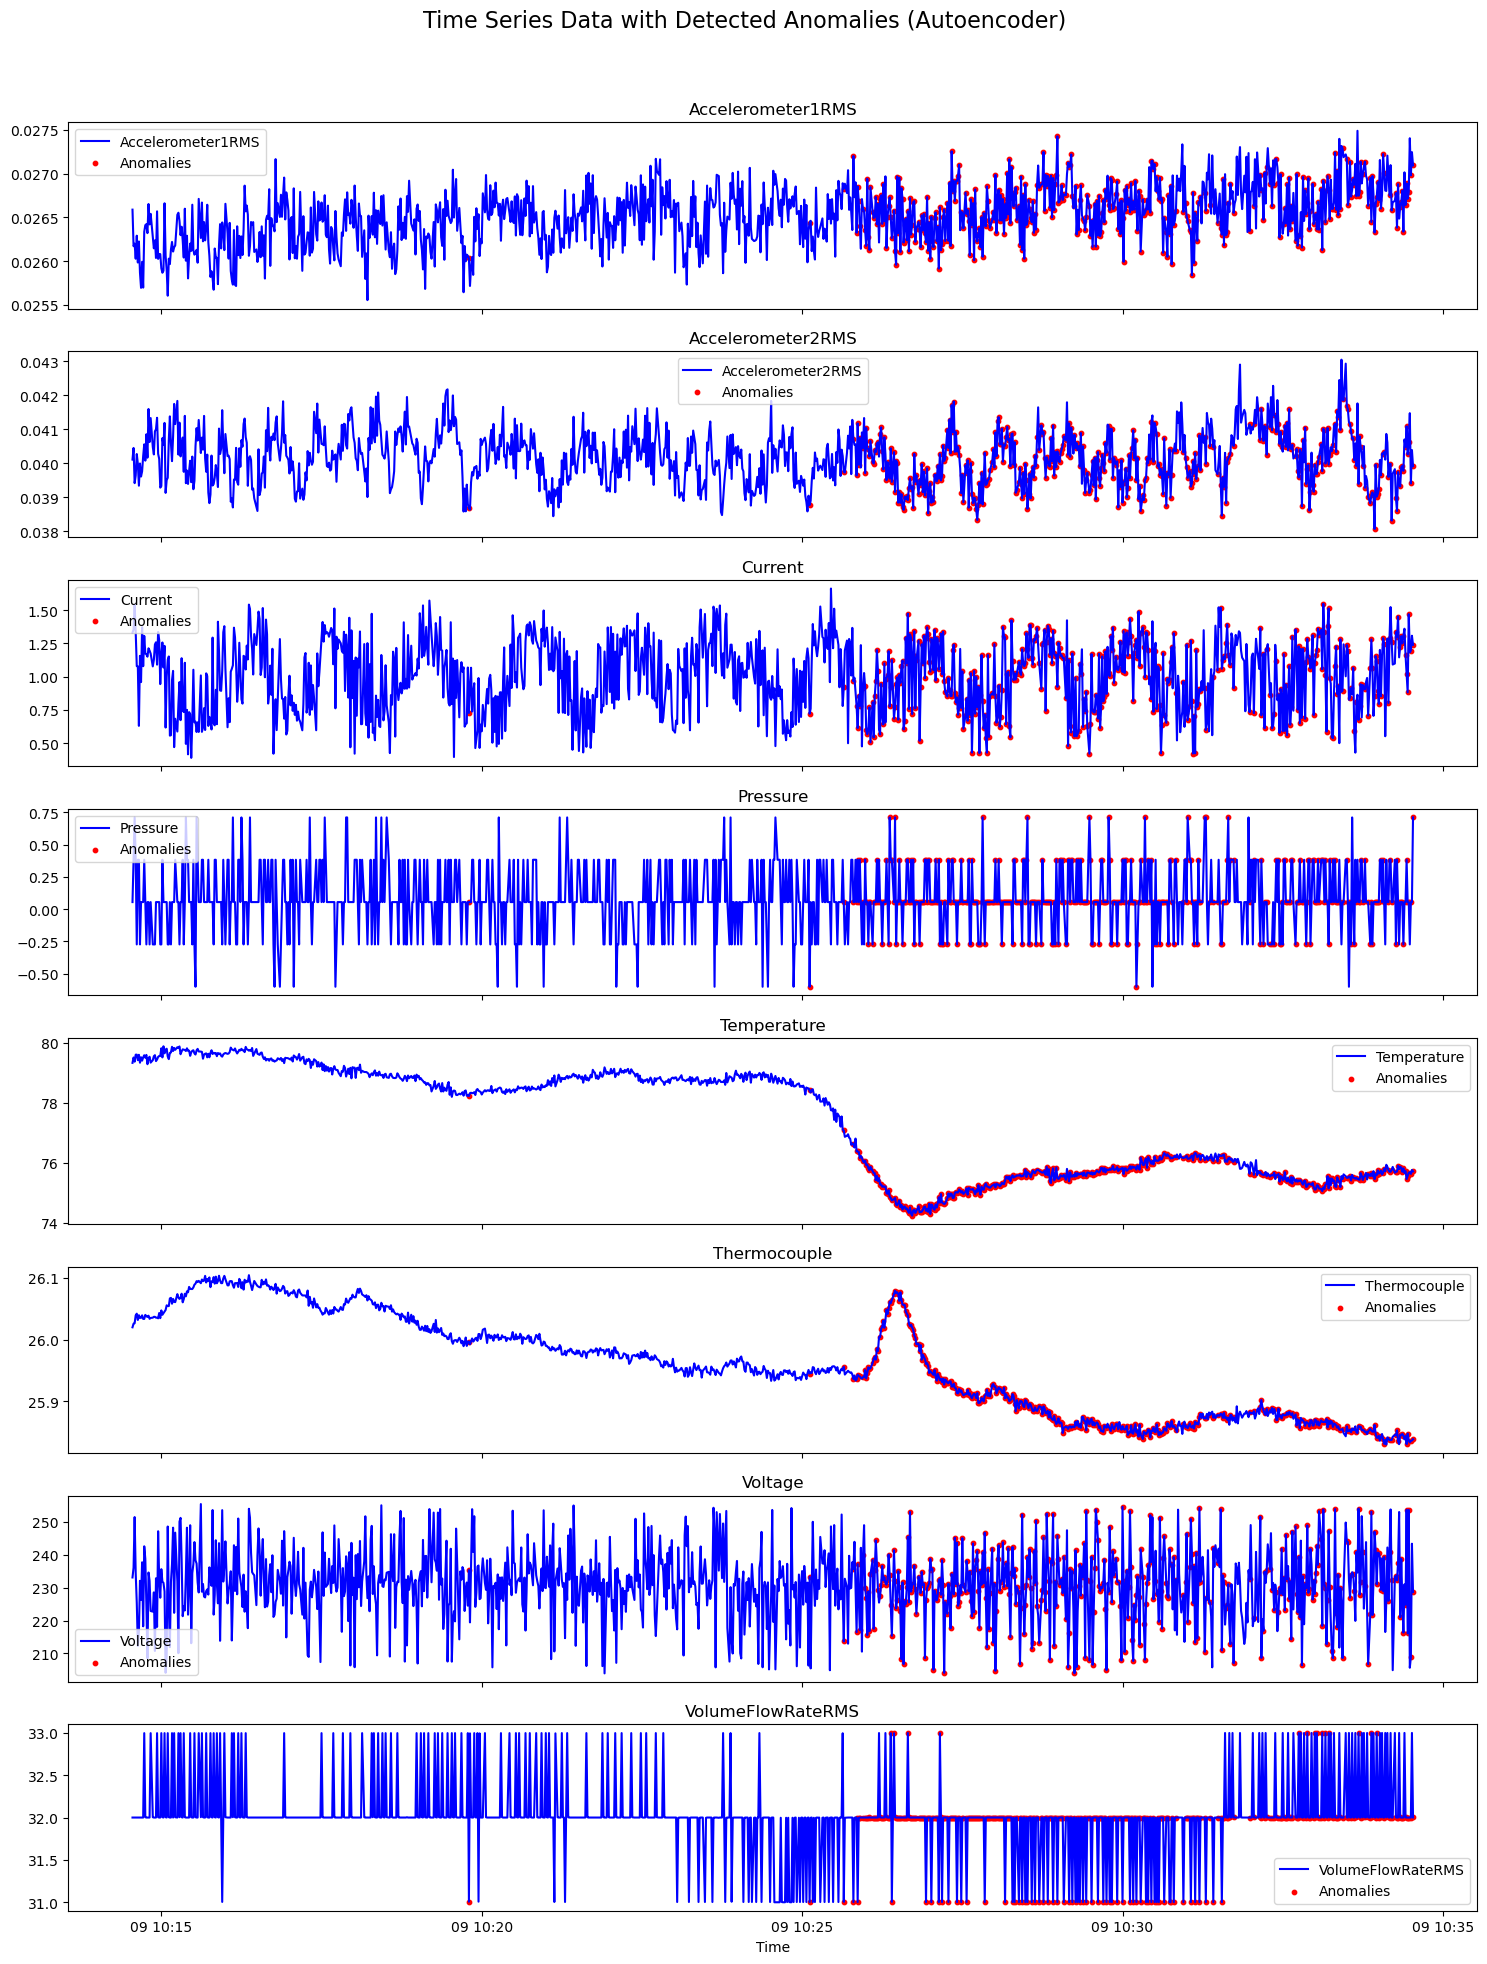

In [84]:
# Функция для подготовки тестовых данных
def prepare_test_data(file_path, expected_columns):
    data = pd.read_csv(file_path)
    data_split = data.iloc[:, 0].str.split(';', expand=True)
    actual_columns = data_split.shape[1]
    data_split.columns = [f"column_{i}" for i in range(actual_columns)]  # Временные заголовки

    # Оставляем только те колонки, которые есть в expected_columns
    column_mapping = {f"column_{i}": col for i, col in enumerate(expected_columns) if i < actual_columns}
    data_split = data_split.rename(columns=column_mapping)
    data_split = data_split[[col for col in expected_columns if col in data_split.columns]]

    # Преобразование типов данных
    if 'datetime' in data_split.columns:
        data_split['datetime'] = pd.to_datetime(data_split['datetime'], errors='coerce')
    for col in expected_columns[1:]:
        if col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

    # Удаление строк с пропущенными значениями
    data_split = data_split.dropna()

    return data_split

# Тестирование на новых данных
test_file = '0.csv'
test_data = prepare_test_data(test_file, columns)
scaler_columns = [col for col in columns[1:] if col in test_data.columns]
test_scaled = scaler.transform(test_data[scaler_columns])
test_tensor = torch.tensor(test_scaled, dtype=torch.float32)

with torch.no_grad():
    reconstructed = autoencoder(test_tensor).numpy()
mse = np.mean(np.power(test_scaled - reconstructed, 2), axis=1)

# Установка порога для аномалий
anomaly_threshold = np.percentile(mse, 65)
test_data['mse'] = mse
test_data['predicted_anomaly'] = test_data['mse'] > anomaly_threshold

# Подсчет и визуализация обнаруженных аномалий
anomalies = test_data[test_data['predicted_anomaly']]
print(f"Обнаружено аномалий: {len(anomalies)}")

fig, axes = plt.subplots(len(scaler_columns), 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Data with Detected Anomalies (Autoencoder)', fontsize=16)

for i, col in enumerate(scaler_columns):
    if col in test_data.columns:
        axes[i].plot(test_data['datetime'], test_data[col], label=col, color='blue')
        anomaly_points = anomalies
        axes[i].scatter(anomaly_points['datetime'], anomaly_points[col], color='red', label='Anomalies', s=10)
        axes[i].set_title(col)
        axes[i].legend()

plt.xlabel('Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

При изменении порога на тестовом датасете до 65% кажется начало детекции аномалий значительно улучшилось!

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Предполагаем, что колонка с реальными метками аномалий в 0.csv называется "anomaly" и содержит 0 (норма) или 1 (аномалия)

# Получаем реальные метки аномалий
test_file = pd.read_csv('0.csv', sep=';')
true_labels = test_file['anomaly'].astype(int)

    # Получаем предсказанные метки аномалий
predicted_labels = test_data['predicted_anomaly'].astype(int)

    # Вычисляем метрики
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.7338
Recall: 0.7357
F1 Score: 0.7347


Значения Precision Recall F1 Score зависят от выбранного порога anomaly_threshold. Чтобы повысить эти значения есть вариант отметить первое и последние аномальное значение детектированное моделью и между ними все точки пометить как аномальные.